# PROJECT IMPLEMENTATION.

### Predictive Modeling and Team Performance Analysis in IPL. 

The Indian Premier League (IPL) is a professional Twenty20 cricket league where international and domestic players compete for franchises. 

This project is based on two datasets. 

- The first dataset, IPL_Matches_2008_2022, contains information about each individual IPL match. Each row in this dataset corresponds to a single match, provides details of the matches played. 

- The second dataset, IPL_Ball_by_Ball_2008_2022, provies detailed information about every ball bowled in the IPL. Each row in this dataset corresponds to an individual ball played throughout the tournament. 

Basically, both datasets, cover information from the IPL seasons 2008 to 2022. They give a complete picture of entire IPL journey.  

### Import the Necessary Libraries.  

In [1]:
import numpy as np # to work with numeric data. 
import pandas as pd # data import, data manipulation, statistics. 
import matplotlib.pyplot as plt # data visualization.
import seaborn as sns # data visualization.

### Basic Understanding of  IPL_Matches_2008_2022 Dataset. 

In [2]:
# load IPL_Matches_2008_2022 dataset in df1. 

df1 = pd.read_csv(r"C:\Users\rohit\OneDrive\Desktop\DOCUMENTATION_AND_IPL_DATASET\IPL_Matches_2008_2022.csv") 

In [3]:
# Check the first rows of the df1 to get an overview of dataset.  

df1.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [4]:
# Total number of rows and columns in the df1. 

df1.shape

(950, 20)

In [5]:
# Get important details about df1, such as data types, non-null values, and memory usage. 

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

In [6]:
# Check for duplicates in df1.  

df1.duplicated().sum()

0

In [7]:
# Check the number of missing values in each column of df1. 

df1.isnull().sum()

ID                   0
City                51
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            4
WinningTeam          4
WonBy                0
Margin              18
method             931
Player_of_Match      4
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
dtype: int64

### Data Cleaning / Data Arrangement in df1. 

In [8]:
# Identifying missing data in 'City' column specifically for the 2020/21 season played in the UAE, 
# shows missing city data for these matches. 

df1[df1['City'].isnull()] 

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
134,1237181,NaN,2020-11-10,2020/21,Final,Delhi Capitals,Mumbai Indians,Dubai International Cricket Stadium,Delhi Capitals,bat,N,Mumbai Indians,Wickets,5.0,NaN,TA Boult,"['MP Stoinis', 'S Dhawan', 'AM Rahane', 'SS Iy...","['RG Sharma', 'Q de Kock', 'SA Yadav', 'Ishan ...",CB Gaffaney,Nitin Menon
137,1237177,NaN,2020-11-05,2020/21,Qualifier 1,Mumbai Indians,Delhi Capitals,Dubai International Cricket Stadium,Delhi Capitals,field,N,Mumbai Indians,Runs,57.0,NaN,JJ Bumrah,"['Q de Kock', 'RG Sharma', 'SA Yadav', 'Ishan ...","['PP Shaw', 'S Dhawan', 'AM Rahane', 'SS Iyer'...",CB Gaffaney,Nitin Menon
138,1216495,NaN,2020-11-03,2020/21,56,Mumbai Indians,Sunrisers Hyderabad,Sharjah Cricket Stadium,Sunrisers Hyderabad,field,N,Sunrisers Hyderabad,Wickets,10.0,NaN,S Nadeem,"['RG Sharma', 'Q de Kock', 'SA Yadav', 'Ishan ...","['DA Warner', 'WP Saha', 'MK Pandey', 'KS Will...",C Shamshuddin,RK Illingworth
140,1216530,NaN,2020-11-01,2020/21,54,Kolkata Knight Riders,Rajasthan Royals,Dubai International Cricket Stadium,Rajasthan Royals,field,N,Kolkata Knight Riders,Runs,60.0,NaN,PJ Cummins,"['Shubman Gill', 'N Rana', 'RA Tripathi', 'SP ...","['RV Uthappa', 'BA Stokes', 'SPD Smith', 'SV S...",Nitin Menon,PR Reiffel
142,1216535,NaN,2020-10-31,2020/21,51,Delhi Capitals,Mumbai Indians,Dubai International Cricket Stadium,Mumbai Indians,field,N,Mumbai Indians,Wickets,9.0,NaN,Ishan Kishan,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'RR Pant', ...","['Ishan Kishan', 'Q de Kock', 'SA Yadav', 'SS ...",YC Barde,PR Reiffel
143,1216502,NaN,2020-10-31,2020/21,52,Royal Challengers Bangalore,Sunrisers Hyderabad,Sharjah Cricket Stadium,Sunrisers Hyderabad,field,N,Sunrisers Hyderabad,Wickets,5.0,NaN,Sandeep Sharma,"['JR Philippe', 'D Padikkal', 'V Kohli', 'AB d...","['DA Warner', 'WP Saha', 'MK Pandey', 'KS Will...",KN Ananthapadmanabhan,K Srinivasan
145,1216536,NaN,2020-10-29,2020/21,49,Kolkata Knight Riders,Chennai Super Kings,Dubai International Cricket Stadium,Chennai Super Kings,field,N,Chennai Super Kings,Wickets,6.0,NaN,RD Gaikwad,"['Shubman Gill', 'N Rana', 'SP Narine', 'RK Si...","['SR Watson', 'RD Gaikwad', 'AT Rayudu', 'MS D...",C Shamshuddin,RK Illingworth
147,1216524,NaN,2020-10-27,2020/21,47,Sunrisers Hyderabad,Delhi Capitals,Dubai International Cricket Stadium,Delhi Capitals,field,N,Sunrisers Hyderabad,Runs,88.0,NaN,WP Saha,"['DA Warner', 'WP Saha', 'MK Pandey', 'KS Will...","['AM Rahane', 'S Dhawan', 'MP Stoinis', 'SO He...",AK Chaudhary,Nitin Menon
148,1216520,NaN,2020-10-26,2020/21,46,Kolkata Knight Riders,Kings XI Punjab,Sharjah Cricket Stadium,Kings XI Punjab,field,N,Kings XI Punjab,Wickets,8.0,NaN,CH Gayle,"['Shubman Gill', 'N Rana', 'RA Tripathi', 'KD ...","['KL Rahul', 'Mandeep Singh', 'CH Gayle', 'N P...",KN Ananthapadmanabhan,RK Illingworth
150,1216544,NaN,2020-10-25,2020/21,44,Royal Challengers Bangalore,Chennai Super Kings,Dubai International Cricket Stadium,Royal Challengers Bangalore,bat,N,Chennai Super Kings,Wickets,8.0,NaN,RD Gaikwad,"['D Padikkal', 'AJ Finch', 'V Kohli', 'AB de V...","['RD Gaikwad', 'F du Plessis', 'AT Rayudu', 'M...",C Shamshuddin,RK Illingworth


In [9]:
# Count of nan values. (venue column gives information to fill the nan values in city column.)  

df1[df1['City'].isnull()]['Venue'].value_counts() 

Dubai International Cricket Stadium    33
Sharjah Cricket Stadium                18
Name: Venue, dtype: int64

In [10]:
# Replacing nan values in 'City' column with respective cities. (Dubai, Sharjah)  

df1.loc[(df1['City'].isnull()) & (df1['Venue'] == 'Dubai International Cricket Stadium'), 'City'] = 'Dubai'
df1.loc[(df1['City'].isnull()) & (df1['Venue'] == 'Sharjah Cricket Stadium'), 'City'] = 'Sharjah'  

In [11]:
# Check nan values. 

df1['City'].isnull().sum()

0

In [12]:
# Changing the datatype of the 'Date' column to datetime which present in object.  

df1['Date'] = pd.to_datetime(df1['Date'])   

### Information about nan values in df1. 

In [13]:
# 'Margin' column contains nan values for matches that decided by a super over or no result. 

df1[df1['Margin'].isnull()]['WonBy'].value_counts()

SuperOver    14
NoResults     4
Name: WonBy, dtype: int64

In [14]:
# For data which has 'no result' data in 'WonBy' column,
# the 'SuperOver,' 'WinningTeam,' and 'Player_of_the_Match' columns contain nan values there.  

df1['WonBy'].value_counts()

Wickets      509
Runs         423
SuperOver     14
NoResults      4
Name: WonBy, dtype: int64

In [15]:
# Check data were matches result decided as 'no result'.  

df1[df1['WonBy']=='NoResults']

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
205,1178424,Bengaluru,2019-04-30,2019,49,Royal Challengers Bangalore,Rajasthan Royals,M.Chinnaswamy Stadium,Rajasthan Royals,field,NaN,NaN,NoResults,NaN,NaN,NaN,"['V Kohli', 'AB de Villiers', 'MP Stoinis', 'H...","['SV Samson', 'LS Livingstone', 'AM Rahane', '...",NJ Llong,UV Gandhe
437,829813,Bangalore,2015-05-17,2015,55,Royal Challengers Bangalore,Delhi Daredevils,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,NaN,NaN,NoResults,NaN,NaN,NaN,"['V Kohli', 'CH Gayle', 'AB de Villiers', 'Man...","['Q de Kock', 'SS Iyer', 'JP Duminy', 'Yuvraj ...",HDPK Dharmasena,K Srinivasan
464,829763,Bangalore,2015-04-29,2015,29,Royal Challengers Bangalore,Rajasthan Royals,M Chinnaswamy Stadium,Rajasthan Royals,field,NaN,NaN,NoResults,NaN,NaN,NaN,"['CH Gayle', 'V Kohli', 'AB de Villiers', 'Man...","['AM Rahane', 'SR Watson', 'SPD Smith', 'KK Na...",JD Cloete,PG Pathak
708,501265,Delhi,2011-05-21,2011,68,Delhi Daredevils,Pune Warriors,Feroz Shah Kotla,Delhi Daredevils,bat,NaN,NaN,NoResults,NaN,NaN,NaN,"['NV Ojha', 'DA Warner', 'MS Wade', 'CA Ingram...","['MK Pandey', 'JP Faulkner', 'SC Ganguly', 'RV...",SS Hazare,RJ Tucker


In [16]:
# Count of nan values in 'SuperOver' column. 

df1[df1['SuperOver'].isnull()]['WonBy'].value_counts() 

NoResults    4
Name: WonBy, dtype: int64

In [17]:
# Count of nan values in 'WinningTeam' column.  

df1[df1['WinningTeam'].isnull()]['WonBy'].value_counts() 

NoResults    4
Name: WonBy, dtype: int64

In [18]:
# Count of nan values in 'Player_of_Match' column.  

df1[df1['Player_of_Match'].isnull()]['WonBy'].value_counts()  

NoResults    4
Name: WonBy, dtype: int64

In [19]:
# 'Method' column has the highest number of nan values, with data present only for matches decided by DLS method.

df1['method'].value_counts()  

D/L    19
Name: method, dtype: int64

In [20]:
# Count of nan values in 'method' column.

df1['method'].isnull().sum()

931

### Univariant Analysis on IPL_Matches_2008_2022 Dataset. 

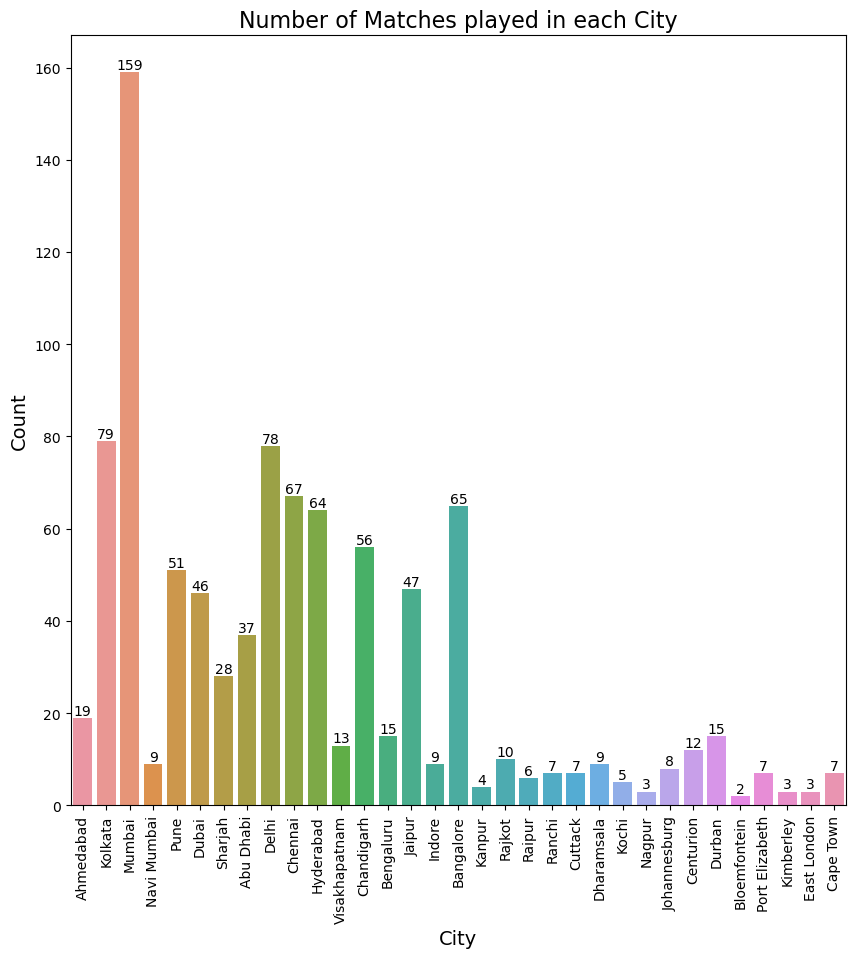

In [21]:
# 'City' column.   

plt.style.use('default') 

plt.figure(figsize=(10,10))

graph = sns.countplot(data=df1, x='City') 

for val in graph.containers:
    
    graph.bar_label(val) 

plt.title('Number of Matches played in each City', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation='vertical')
plt.show()  

In [22]:
# 'Venue' column. (Count of matches played in each stadium.)  

temp_df = df1['Venue'].value_counts().reset_index()
temp_df.rename(columns={'index':'Stadium_Name', 'Venue':'Match_Played_Count'}, inplace=True)

temp_df  

,Stadium_Name,Match_Played_Count
0,Eden Gardens,77
1,Wankhede Stadium,73
2,M Chinnaswamy Stadium,65
3,Feroz Shah Kotla,60
4,"Rajiv Gandhi International Stadium, Uppal",49
5,"MA Chidambaram Stadium, Chepauk",48
6,Sawai Mansingh Stadium,47
7,Dubai International Cricket Stadium,46
8,"Punjab Cricket Association Stadium, Mohali",35
9,"Wankhede Stadium, Mumbai",31


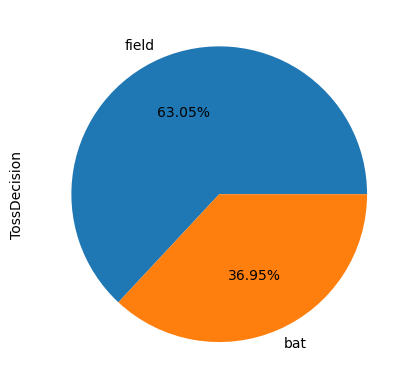

In [23]:
# 'TossDecision' column.  

df1['TossDecision'].value_counts().plot(kind='pie', autopct="%0.2f%%")  

plt.show() 

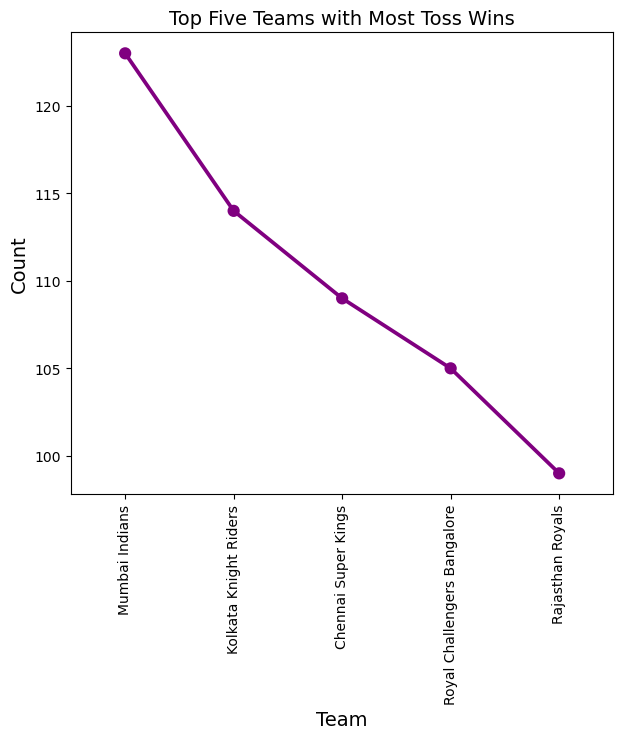

In [24]:
# 'TossWinner' column.  

temp_df = df1['TossWinner'].value_counts().head().reset_index()
temp_df.rename(columns={'index':'Team','TossWinner':'Toss_Win_Count'}, inplace=True)

plt.figure(figsize=(7,6)) 

sns.pointplot(data=temp_df, x='Team', y='Toss_Win_Count', color='purple') 

plt.title('Top Five Teams with Most Toss Wins', fontsize=14)
plt.xlabel('Team', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation='vertical')
plt.show()  

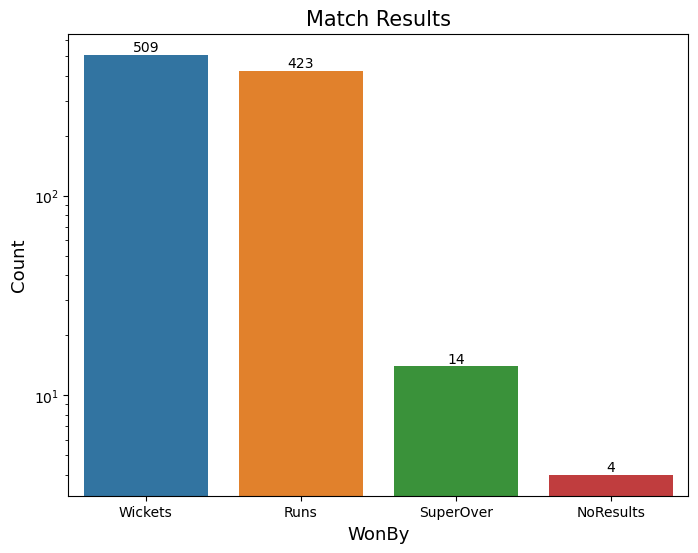

In [25]:
# 'WonBy' column. 

plt.figure(figsize=(8,6)) 

graph = sns.countplot(data=df1, x='WonBy') 

for val in graph.containers:
    
    graph.bar_label(val) 

plt.title('Match Results', fontsize=15)
plt.xlabel('WonBy', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.yscale('log')
plt.show() 

In [26]:
# 'SuperOver' column.

val1 = round(df1['SuperOver'].value_counts().values[0]/df1.shape[0]*100,2)
val2 = round(df1['SuperOver'].value_counts().values[1]/df1.shape[0]*100,2)

print("\033[1m", val1, "Percent matches decided without SuperOver.")
print("\033[1m", val2, "Percent matches decided by SuperOver.")   

 98.11 Percent matches decided without SuperOver.
 1.47 Percent matches decided by SuperOver.


In [27]:
# 'method' column.  

val = df1['method'].value_counts().values[0]/df1.shape[0]

print("\033[1m", 'Only', val, "percent matches decided by DLS method:") 

 Only 0.02 percent matches decided by DLS method:


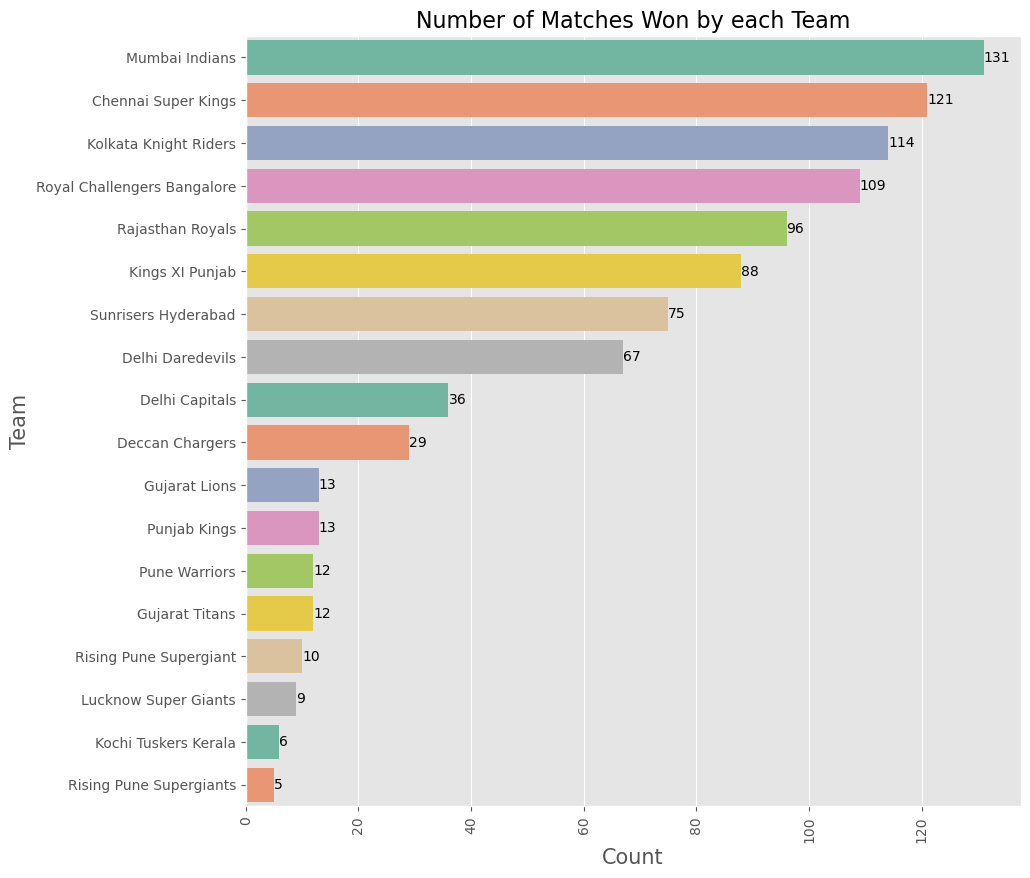

In [28]:
# 'WinningTeam' column. 

plt.style.use('ggplot')  

temp_df = df1['WinningTeam'].value_counts().reset_index()
temp_df.rename(columns={'index':'Team','WinningTeam':'Number_of_Wins'}, inplace=True) 

plt.figure(figsize=(10,10))

graph = sns.barplot(data=temp_df, y='Team', x='Number_of_Wins', palette='Set2') 

for val in graph.containers:
    
    graph.bar_label(val) 

plt.title('Number of Matches Won by each Team', fontsize=16)
plt.xlabel('Count', fontsize=15)
plt.ylabel('Team', fontsize=15)
plt.xticks(rotation='vertical')
plt.show() 

In [29]:
# 'Player_of_Match' column. (Top ten players with most number of player of the match award.)  

temp_df = df1['Player_of_Match'].value_counts().head(10).reset_index()
temp_df.rename(columns={'index':'Player', 'Player_of_Match':'Player_of_Match_count'}, inplace=True)

temp_df 

,Player,Player_of_Match_count
0,AB de Villiers,25
1,CH Gayle,22
2,DA Warner,18
3,RG Sharma,18
4,MS Dhoni,17
5,YK Pathan,16
6,SR Watson,16
7,KA Pollard,14
8,SK Raina,14
9,V Kohli,14


### Bivariant Analysis and Multivariant Analysis on IPL_Matches_2008_2022 Dataset. 

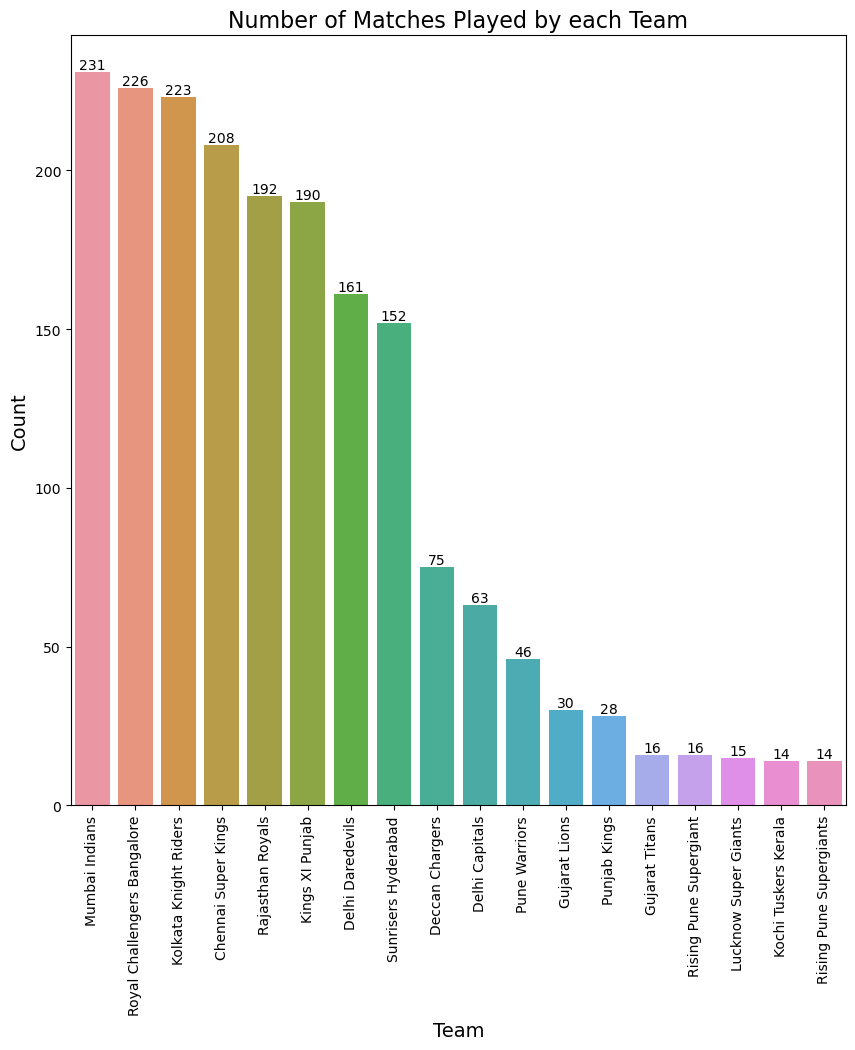

In [30]:
# 'Team1' and 'Team2' columns.  

plt.style.use('default')  

temp_df = (df1['Team1'].value_counts() + df1['Team2'].value_counts()).sort_values(ascending=False).reset_index()
temp_df.rename(columns={'index':'Team',0:'Matches_Played'}, inplace=True) 

plt.figure(figsize=(10,10))

graph = sns.barplot(data=temp_df, x='Team', y='Matches_Played') 

for val in graph.containers:
    
    graph.bar_label(val) 

plt.title('Number of Matches Played by each Team', fontsize=16)
plt.xlabel('Team', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation='vertical')
plt.show()   

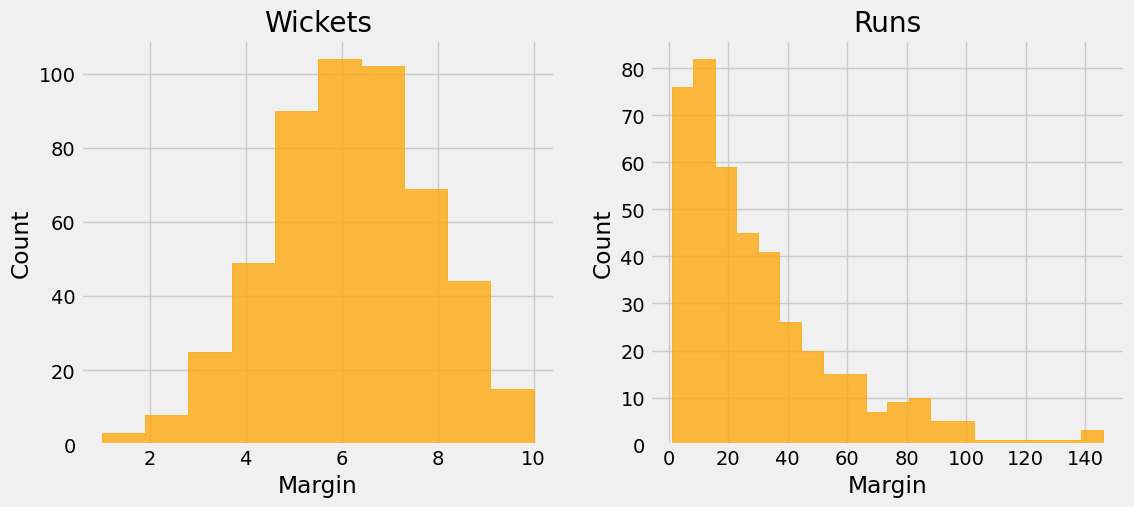

In [31]:
# 'Margin' and 'WonBy' columns.  

plt.style.use('fivethirtyeight') 

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5))

sns.histplot(df1[df1['WonBy']=='Wickets']['Margin'], bins=10, element='step', color='orange', ax=ax[0]) 
ax[0].set_title('Wickets')

sns.histplot(df1[df1['WonBy']=='Runs']['Margin'], bins=20, element='step', color='orange', ax=ax[1]) 
ax[1].set_title('Runs')

plt.show() 

In [32]:
# Top five wins by run margin. 

df1[df1['WonBy']=='Runs'][['Team1','Team2','WinningTeam','Margin']].sort_values('Margin', ascending=False).head()

,Team1,Team2,WinningTeam,Margin
329,Delhi Daredevils,Mumbai Indians,Mumbai Indians,146.0
388,Royal Challengers Bangalore,Gujarat Lions,Royal Challengers Bangalore,144.0
949,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,140.0
453,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,138.0
597,Royal Challengers Bangalore,Pune Warriors,Royal Challengers Bangalore,130.0


In [33]:
# 'Umpire1' and 'Umpire2' columns. (Umpire with the most on-field appearances in matches.)  

temp_df = (df1['Umpire1'].value_counts() + df1['Umpire2'].value_counts()).sort_values(ascending=False).reset_index().head(10)
temp_df.rename(columns={'index':'Umpire',0:'On_Field_Count'}, inplace=True)
temp_df['On_Field_Count'] = temp_df['On_Field_Count'].astype(int) 

temp_df

,Umpire,On_Field_Count
0,S Ravi,131
1,AK Chaudhary,111
2,HDPK Dharmasena,94
3,C Shamshuddin,88
4,Nitin Menon,83
5,CB Gaffaney,69
6,M Erasmus,67
7,CK Nandan,59
8,BNJ Oxenford,57
9,KN Ananthapadmanabhan,56


### Basic Understanding of IPL_Ball_by_Ball_2008_2022 Dataset.  

In [34]:
# load IPL_Ball_by_Ball_2008_2022 dataset in df2.   

df2 = pd.read_csv(r"C:\Users\rohit\OneDrive\Desktop\DOCUMENTATION_AND_IPL_DATASET\IPL_Ball_by_Ball_2008_2022.csv")  

In [35]:
# Check the first rows of the df2 to get an overview of dataset.  

df2.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [36]:
# Total number of rows and columns in the df2.   

df2.shape

(225954, 17)

In [37]:
# Get important details about df2, such as data types, non-null values, and memory usage.  

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225954 entries, 0 to 225953
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ID                 225954 non-null  int64 
 1   innings            225954 non-null  int64 
 2   overs              225954 non-null  int64 
 3   ballnumber         225954 non-null  int64 
 4   batter             225954 non-null  object
 5   bowler             225954 non-null  object
 6   non-striker        225954 non-null  object
 7   extra_type         12049 non-null   object
 8   batsman_run        225954 non-null  int64 
 9   extras_run         225954 non-null  int64 
 10  total_run          225954 non-null  int64 
 11  non_boundary       225954 non-null  int64 
 12  isWicketDelivery   225954 non-null  int64 
 13  player_out         11151 non-null   object
 14  kind               11151 non-null   object
 15  fielders_involved  7988 non-null    object
 16  BattingTeam        2

In [38]:
# Check for duplicates in df2.   

df2.duplicated().sum()

0

In [39]:
# Check the number of missing values in each column of df2.  

df2.isnull().sum()

ID                        0
innings                   0
overs                     0
ballnumber                0
batter                    0
bowler                    0
non-striker               0
extra_type           213905
batsman_run               0
extras_run                0
total_run                 0
non_boundary              0
isWicketDelivery          0
player_out           214803
kind                 214803
fielders_involved    217966
BattingTeam               0
dtype: int64

### Information about nan values in df2.  

In [40]:
# 'extra_type' column contains null values where balls bowled are legal deliveries.

df2['extra_type'].isnull().sum() 

213905

In [41]:
# Null values in the 'player_out','kind', 'fielders_involved', where a player did not get out during the match. 

print('player_out:', df2['extra_type'].isnull().sum()) 
print('kind:', df2['extra_type'].isnull().sum()) 
print('fielders_involved:', df2['extra_type'].isnull().sum())

player_out: 213905
kind: 213905
fielders_involved: 213905


### Univariant, Bivariant, Multivariant Analysis on IPL_Ball_by_Ball_2008_2022 Dataset. 

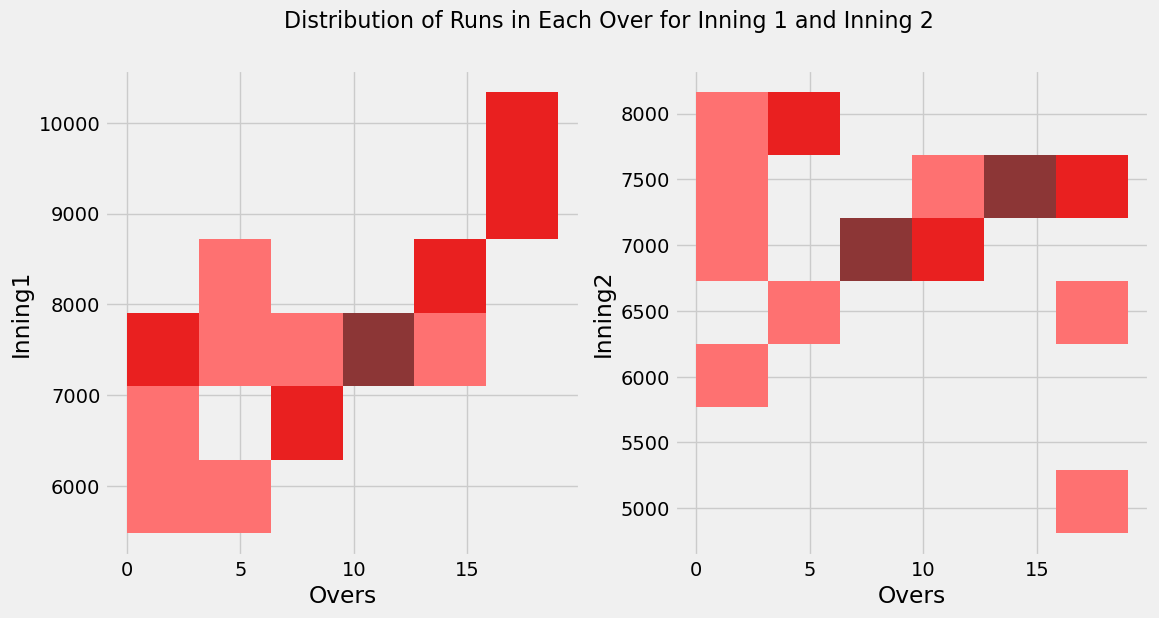

In [85]:
# 'innings' and 'overs' columns. 

plt.style.use('fivethirtyeight') 

temp_df = df2[df2['innings'].isin([1,2])]
temp_df = temp_df.pivot_table(index='overs', columns='innings', values='total_run', aggfunc=sum) 
temp_df = pd.DataFrame(temp_df.to_records()) 
temp_df.rename(columns={'overs':'Overs','1':'Inning1','2':'Inning2'}, inplace=True)
temp_df

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(12,6))

sns.histplot(data=temp_df, x='Overs', y='Inning1', ax=ax[0], color='Red') 
sns.histplot(data=temp_df, x='Overs', y='Inning2', ax=ax[1], color='Red') 

plt.suptitle('Distribution of Runs in Each Over for Inning 1 and Inning 2', fontsize=16)
plt.show()

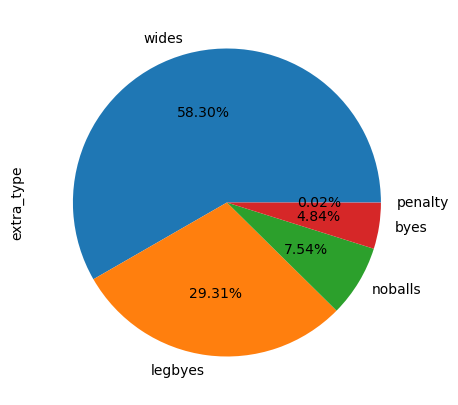

In [43]:
# 'extra_type' column. 

plt.style.use('default')  

df2['extra_type'].value_counts().plot(kind='pie', autopct="%0.2f%%", figsize=(5,5)) 

plt.show() 

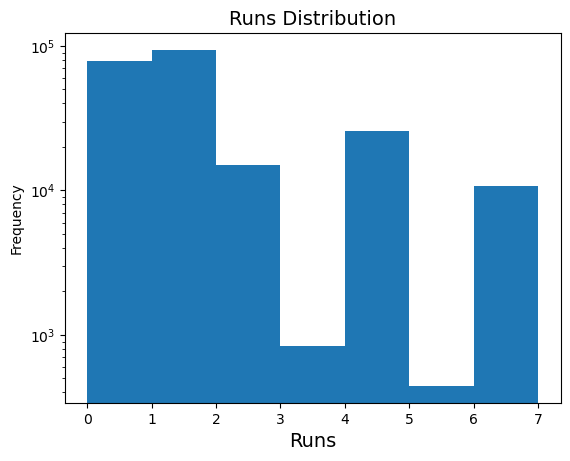

In [44]:
# 'total_run' column.

plt.style.use('default')  

df2['total_run'].plot(kind='hist', bins=7, logy=True) 

plt.title('Runs Distribution', fontsize=14) 
plt.xlabel('Runs', fontsize=14)
plt.show()   

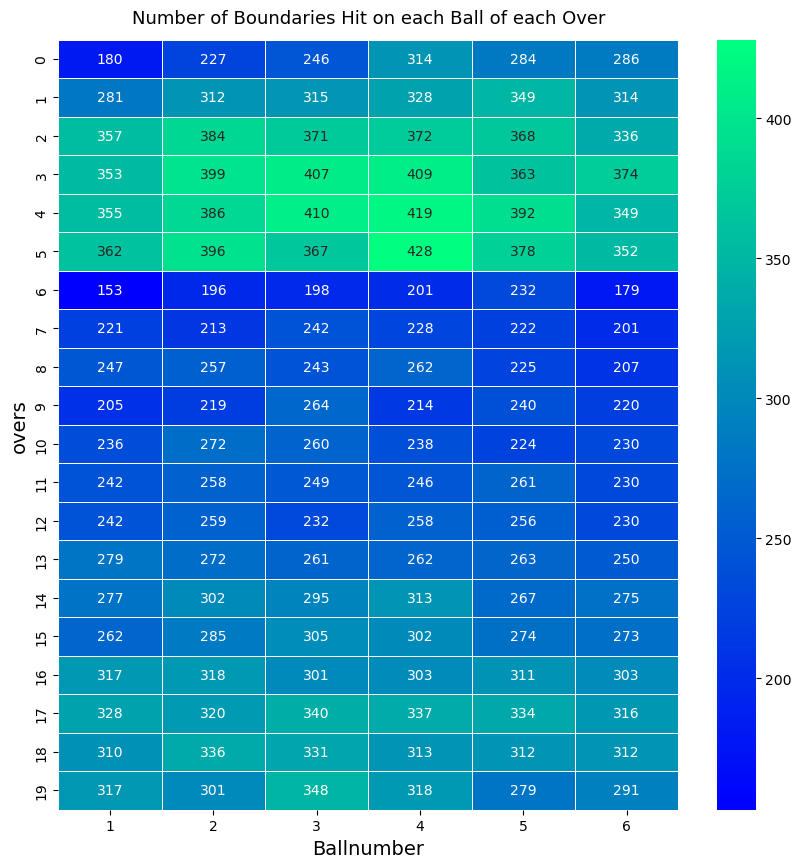

In [45]:
# 'overs', 'ballnumber', 'non_boundary' columns. 

temp_df = df2[(df2['ballnumber'].isin([1,2,3,4,5,6])) & (df2['batsman_run'].isin([6,4])) & (df2['non_boundary']==0)]
temp_df = temp_df.pivot_table(index='overs', columns='ballnumber', values='batsman_run', aggfunc='count')

plt.figure(figsize=(10,10))

sns.heatmap(data=temp_df, annot=True, fmt='d', linewidths=0.5, cmap='winter') 

plt.title('Number of Boundaries Hit on each Ball of each Over', fontsize=13, pad=12)
plt.xlabel('Ballnumber', fontsize=14)
plt.ylabel('overs', fontsize=14)
plt.show() 

In [46]:
# 'kind' column. (Frequency of players dismissals with a count of how players got out.)  

temp_df = df2['kind'].value_counts().reset_index()
temp_df.rename(columns={'index':'Wicket_type','kind':'Count_of_Getting_Out'}, inplace=True) 

temp_df 

,Wicket_type,Count_of_Getting_Out
0,caught,6837
1,bowled,1944
2,run out,1007
3,lbw,685
4,stumped,325
5,caught and bowled,323
6,hit wicket,14
7,retired hurt,13
8,obstructing the field,2
9,retired out,1


### Merging both IPL_Matches_2008_2022 and IPL_Ball_by_Ball_2008_2022 Datasets. 

In [47]:
# Merge datasets and store in df. 

df = df2.merge(df1, left_on='ID', right_on='ID') 

In [48]:
# get an overview of df. 

df.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,...,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,...,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,...,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,...,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,...,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,...,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon


In [49]:
# Get important information about df.

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225954 entries, 0 to 225953
Data columns (total 36 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ID                 225954 non-null  int64         
 1   innings            225954 non-null  int64         
 2   overs              225954 non-null  int64         
 3   ballnumber         225954 non-null  int64         
 4   batter             225954 non-null  object        
 5   bowler             225954 non-null  object        
 6   non-striker        225954 non-null  object        
 7   extra_type         12049 non-null   object        
 8   batsman_run        225954 non-null  int64         
 9   extras_run         225954 non-null  int64         
 10  total_run          225954 non-null  int64         
 11  non_boundary       225954 non-null  int64         
 12  isWicketDelivery   225954 non-null  int64         
 13  player_out         11151 non-null   object  

### Batting / Batsman's Analysis. 

In [50]:
# Analyzing the best five batsmen in IPL and how well they played each season.

# Top five batsmen with most runs in IPL. 

df[df['innings'].isin([1,2])].groupby('batter')['batsman_run'].sum().sort_values(ascending=False).head().reset_index() 

,batter,batsman_run
0,V Kohli,6624
1,S Dhawan,6244
2,DA Warner,5881
3,RG Sharma,5879
4,SK Raina,5528


In [51]:
# Total number of seasons played in the IPL.

season_list = df['Season'].unique().tolist()
season_list.sort()
season_list 

['2007/08',
 '2009',
 '2009/10',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020/21',
 '2021',
 '2022']

In [52]:
# Top five batsmen list. 

batsman_name = df[df['innings'].isin([1,2])].groupby('batter')['batsman_run'].sum().sort_values(ascending=False).head().index.to_list()
batsman_name.sort()
batsman_name 

['DA Warner', 'RG Sharma', 'S Dhawan', 'SK Raina', 'V Kohli']

In [53]:
# Number of runs scored by the top five batsmen in each IPL season. 

top_batsmans_df = pd.DataFrame(columns=['DA Warner', 'RG Sharma', 'S Dhawan', 'SK Raina', 'V Kohli'])  

for val in season_list:
    
    players = []
    runs = []
    
    players = df[(df['innings'].isin([1,2])) & (df['Season']==val) & (df['batter'].isin(batsman_name))].groupby('batter')['batsman_run'].sum().index.to_list()
    runs = df[(df['innings'].isin([1,2])) & (df['Season']==val) & (df['batter'].isin(batsman_name))].groupby('batter')['batsman_run'].sum().values.tolist()
    
    if len(batsman_name) != len(players): 
        
        for temp in batsman_name: 
            
            if temp not in players:
                
                if temp == 'DA Warner':
                    
                    runs.insert(0,0) 
                
                else:
                    
                    runs.insert(3,0)  
    
    len_df = len(top_batsmans_df) 
    
    top_batsmans_df.loc[len_df] = runs 

top_batsmans_df.insert(0,'Season',season_list) 

top_batsmans_df  

,Season,DA Warner,RG Sharma,S Dhawan,SK Raina,V Kohli
0,2007/08,0,404,340,421,165
1,2009,163,362,40,434,246
2,2009/10,282,404,191,520,307
3,2011,324,372,400,438,557
4,2012,256,433,569,441,364
5,2013,410,538,311,548,634
6,2014,528,390,377,523,359
7,2015,562,482,353,374,505
8,2016,848,489,501,399,973
9,2017,641,333,479,442,308


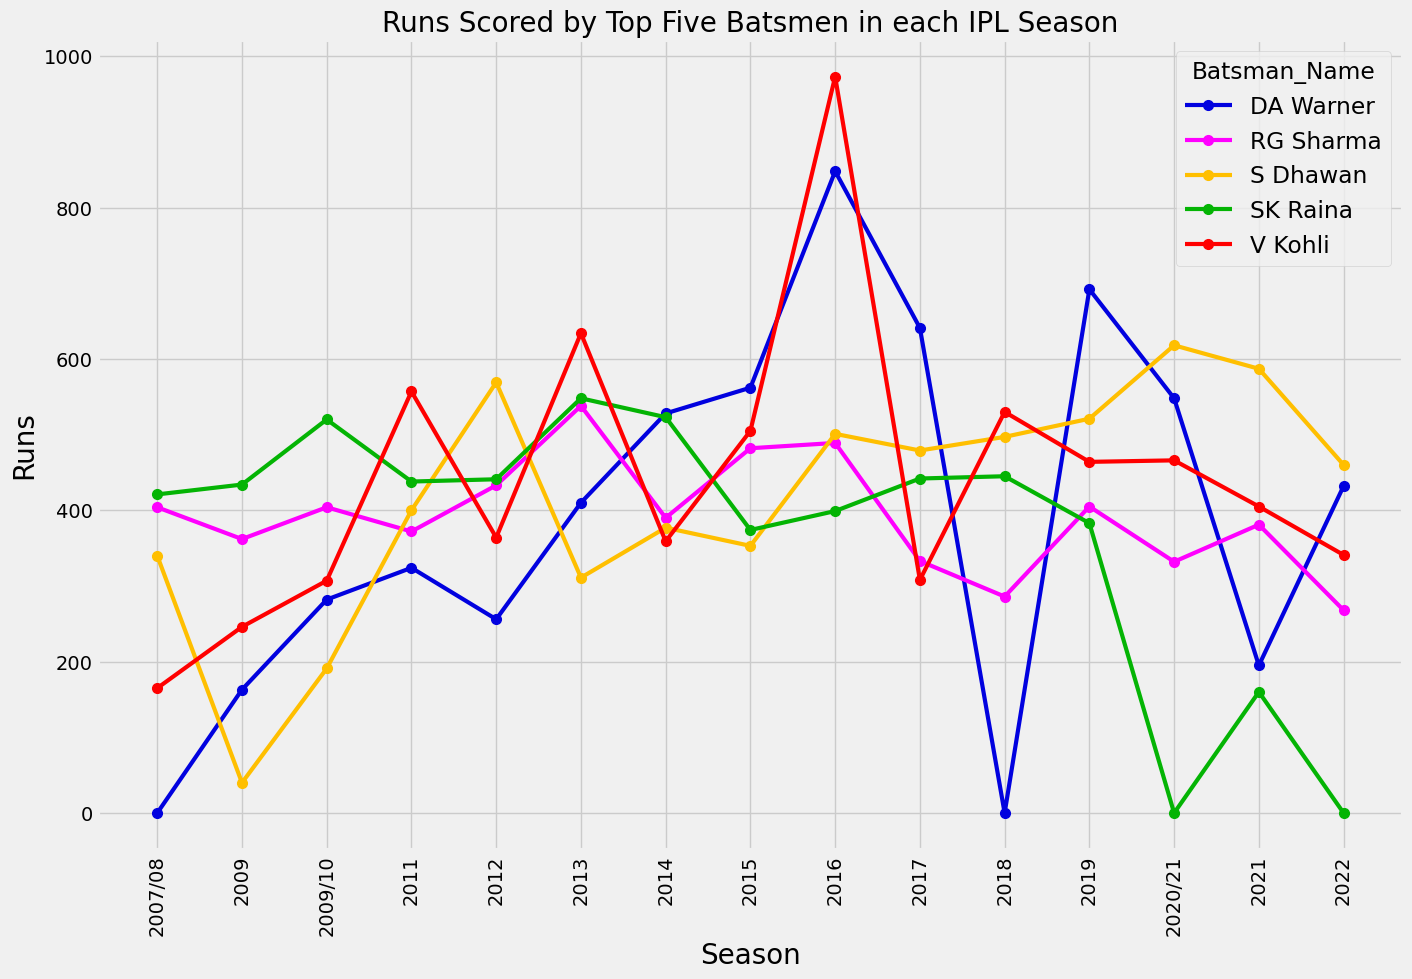

In [54]:
# Lineplot to visualize the runs scored by the top five batsmen in each IPL season. 

plt.style.use('fivethirtyeight') 

plt.figure(figsize=(15,10))

plt.plot(top_batsmans_df['Season'], top_batsmans_df['DA Warner'], marker='.', markersize=14, linewidth=3, color='#0101DF', label='DA Warner') 
plt.plot(top_batsmans_df['Season'], top_batsmans_df['RG Sharma'], marker='.', markersize=14, linewidth=3, color='#FF00FF', label='RG Sharma') 
plt.plot(top_batsmans_df['Season'], top_batsmans_df['S Dhawan'], marker='.', markersize=14, linewidth=3, color='#FFBF00', label='S Dhawan') 
plt.plot(top_batsmans_df['Season'], top_batsmans_df['SK Raina'], marker='.', markersize=14, linewidth=3, color='#04B404', label='SK Raina') 
plt.plot(top_batsmans_df['Season'], top_batsmans_df['V Kohli'], marker='.', markersize=14, linewidth=3, color='#FF0000', label='V Kohli')

plt.title('Runs Scored by Top Five Batsmen in each IPL Season', fontsize=20)
plt.xlabel('Season', fontsize=20)
plt.ylabel('Runs', fontsize=20)
plt.xticks(rotation='vertical')
plt.legend(title='Batsman_Name', title_fontsize='large', fontsize='large')
plt.show()    

In [55]:
# Destructive batsmen of the IPL.
# Condition: (sr>=150 and min_balls=200)  

temp = df[~(df['extra_type']=='wides')]
temp = temp[temp['overs']>15].groupby('batter')['ID'].count()
check = temp > 200
ball_series = temp[check]
batsman_name = ball_series.index.tolist() 

runs_series = df[(df['overs']>15) & (df['batter'].isin(batsman_name))].groupby('batter')['batsman_run'].sum() 

strike_rate = round((runs_series/ball_series)*100,2)
strike_rate = strike_rate.sort_values(ascending=False).reset_index() 
strike_rate.rename(columns={'batter':'Player_Name',0:'Strike_Rate'}, inplace=True)
temp_df = strike_rate[strike_rate['Strike_Rate']>150]

temp_df  

,Player_Name,Strike_Rate
0,AB de Villiers,232.57
1,AD Russell,209.31
2,RR Pant,202.27
3,V Kohli,201.83
4,SO Hetmyer,199.54
5,RG Sharma,197.07
6,KL Rahul,195.05
7,SV Samson,192.95
8,DA Warner,188.21
9,DJ Bravo,187.35


In [56]:
# Top ten batsmen who was at the non-strike end for most number of balls in the IPL. 

temp_df = df[df['innings'].isin([1,2])].groupby('non-striker')['ID'].count().sort_values(ascending=False).head(10).reset_index()
temp_df.rename(columns={'non-striker':'Player_Name','ID':'No_of_Times_Other_end'}, inplace=True)
temp_df 

,Player_Name,No_of_Times_Other_end
0,S Dhawan,5522
1,V Kohli,5142
2,RG Sharma,4624
3,SK Raina,4309
4,DA Warner,4105
5,RV Uthappa,3775
6,G Gambhir,3740
7,AM Rahane,3739
8,MS Dhoni,3462
9,AT Rayudu,3423


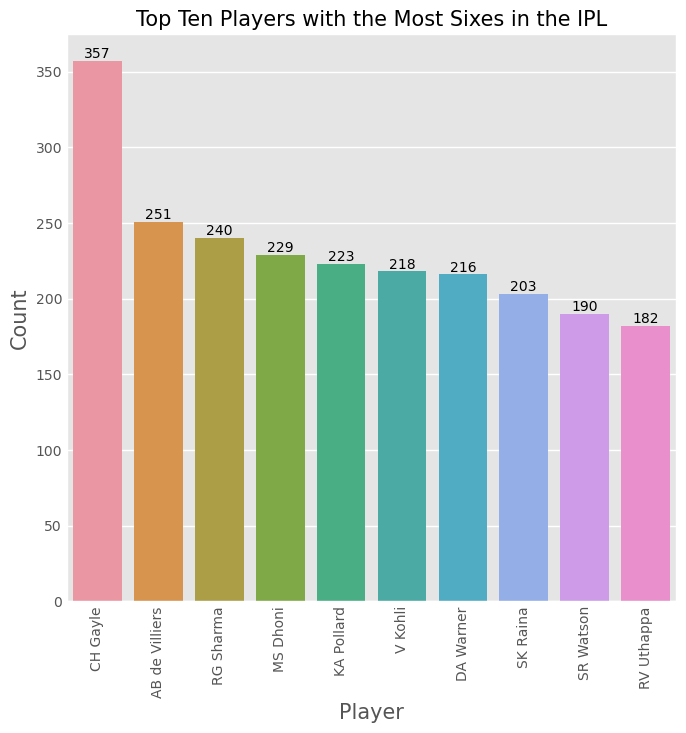

In [57]:
# Visualization of the top ten players with the most sixes in the IPL.

plt.style.use('ggplot') 

plt.figure(figsize=(7,7))

temp_df = df[(df['innings'].isin([1,2])) & (df2['batsman_run']==6) & (df2['non_boundary']==0)].groupby('batter')['ID'].count().sort_values(ascending=False).head(10).reset_index()
temp_df.rename(columns={'batter':'Batsman_Name','ID':'No_of_Six'}, inplace=True)

graph = sns.barplot(data=temp_df, x='Batsman_Name', y='No_of_Six') 

for val in graph.containers:
    
    graph.bar_label(val) 

plt.title('Top Ten Players with the Most Sixes in the IPL', fontsize=15)
plt.xlabel('Player', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation='vertical') 
plt.show()   

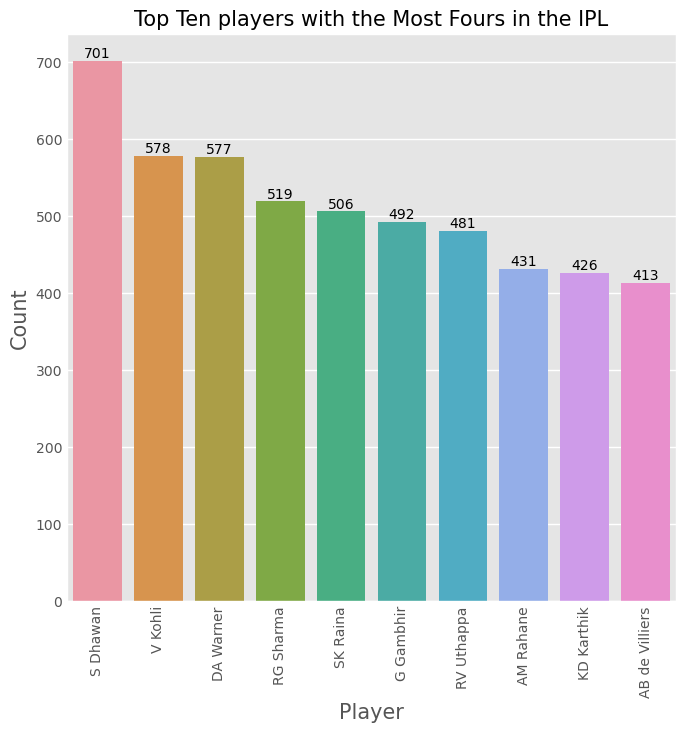

In [58]:
# Visualization of the top ten players with the most fours in the IPL. 

temp_df = df[(df['innings'].isin([1,2])) & (df2['batsman_run']==4) & (df2['non_boundary']==0)].groupby('batter')['ID'].count().sort_values(ascending=False).head(10).reset_index()
temp_df.rename(columns={'batter':'Batsman_Name','ID':'No_of_Four'}, inplace=True)

plt.figure(figsize=(7,7))

graph = sns.barplot(data=temp_df, x='Batsman_Name', y='No_of_Four') 

for val in graph.containers:
    
    graph.bar_label(val) 

plt.title('Top Ten players with the Most Fours in the IPL', fontsize=15)
plt.xlabel('Player', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation='vertical') 
plt.show()   

In [59]:
# Top ten players with most number of dot balls in the IPL.  

temp_df = df[(df['innings'].isin([1,2])) & (df2['batsman_run']==0)].groupby('batter')['ID'].count().sort_values(ascending=False).head(10).reset_index()
temp_df.rename(columns={'batter':'Player_Name','ID':'No_of_Dot_Balls'}, inplace=True)
temp_df  

,Player_Name,No_of_Dot_Balls
0,S Dhawan,1958
1,V Kohli,1886
2,RG Sharma,1778
3,CH Gayle,1634
4,DA Warner,1633
5,RV Uthappa,1598
6,SK Raina,1475
7,MS Dhoni,1370
8,G Gambhir,1357
9,AM Rahane,1341


In [60]:
# List of batsmen name.

batsman_name = df['batter'].value_counts().index.tolist()  

batsman_name  

['V Kohli',
 'S Dhawan',
 'RG Sharma',
 'DA Warner',
 'SK Raina',
 'RV Uthappa',
 'MS Dhoni',
 'G Gambhir',
 'CH Gayle',
 'AB de Villiers',
 'AM Rahane',
 'KD Karthik',
 'AT Rayudu',
 'MK Pandey',
 'KL Rahul',
 'SR Watson',
 'F du Plessis',
 'SV Samson',
 'KA Pollard',
 'PA Patel',
 'YK Pathan',
 'SS Iyer',
 'JH Kallis',
 'BB McCullum',
 'M Vijay',
 'Yuvraj Singh',
 'Q de Kock',
 'RA Jadeja',
 'SR Tendulkar',
 'RR Pant',
 'SPD Smith',
 'SA Yadav',
 'JC Buttler',
 'WP Saha',
 'R Dravid',
 'SE Marsh',
 'DA Miller',
 'V Sehwag',
 'DR Smith',
 'MA Agarwal',
 'KS Williamson',
 'AJ Finch',
 'JP Duminy',
 'N Rana',
 'MEK Hussey',
 'GJ Maxwell',
 'AC Gilchrist',
 'Shubman Gill',
 'DPMD Jayawardene',
 'MK Tiwary',
 'Ishan Kishan',
 'KC Sangakkara',
 'HH Pandya',
 'Mandeep Singh',
 'NV Ojha',
 'SC Ganguly',
 'RA Tripathi',
 'SS Tiwary',
 'DJ Bravo',
 'S Badrinath',
 'AD Russell',
 'KK Nair',
 'EJG Morgan',
 'BJ Hodge',
 'PP Shaw',
 'DJ Hussey',
 'D Padikkal',
 'TM Dilshan',
 'KH Pandya',
 'KM Ja

In [61]:
# Average and strike-rate of each batsmen in the IPL. 

batsmans_data = pd.DataFrame(columns=['PLAYER_NAME', 'RUNS', 'AVERAGE', 'STRIKE_RATE'])  

for val in batsman_name:
    
    temp_list = []
        
    runs = sum(df[(df['innings'].isin([1,2])) & (df['batter']==val)]['batsman_run'].values.tolist())

    temp_df = df[(df['innings'].isin([1,2])) & (df['batter']==val)]
    
    balls = (temp_df.shape[0]) - (temp_df[temp_df['extra_type']=='wides'].shape[0])

    out = df[(df['innings'].isin([1,2])) & (df['player_out']==val)].shape[0] 
    
    if out!=0:
        
        avg = round(runs/out,2)
    
    else:
        
        avg = 0 
    
    strike_rate = round((runs/balls)*100,2)
    
    temp_list = temp_list + [val, runs, avg, strike_rate] 
    
    len_df = len(batsmans_data) 
    
    batsmans_data.loc[len_df] = temp_list 

batsmans_data  

,PLAYER_NAME,RUNS,AVERAGE,STRIKE_RATE
0,V Kohli,6624,36.20,129.15
1,S Dhawan,6244,34.88,126.35
2,RG Sharma,5879,30.30,129.89
3,DA Warner,5881,42.01,140.69
4,SK Raina,5528,32.52,136.73
...,...,...,...,...
600,S Lamichhane,0,0.00,0.00
601,JL Denly,0,0.00,0.00
602,NJ Rimmington,1,0.00,100.00
603,Y Prithvi Raj,0,0.00,0.00


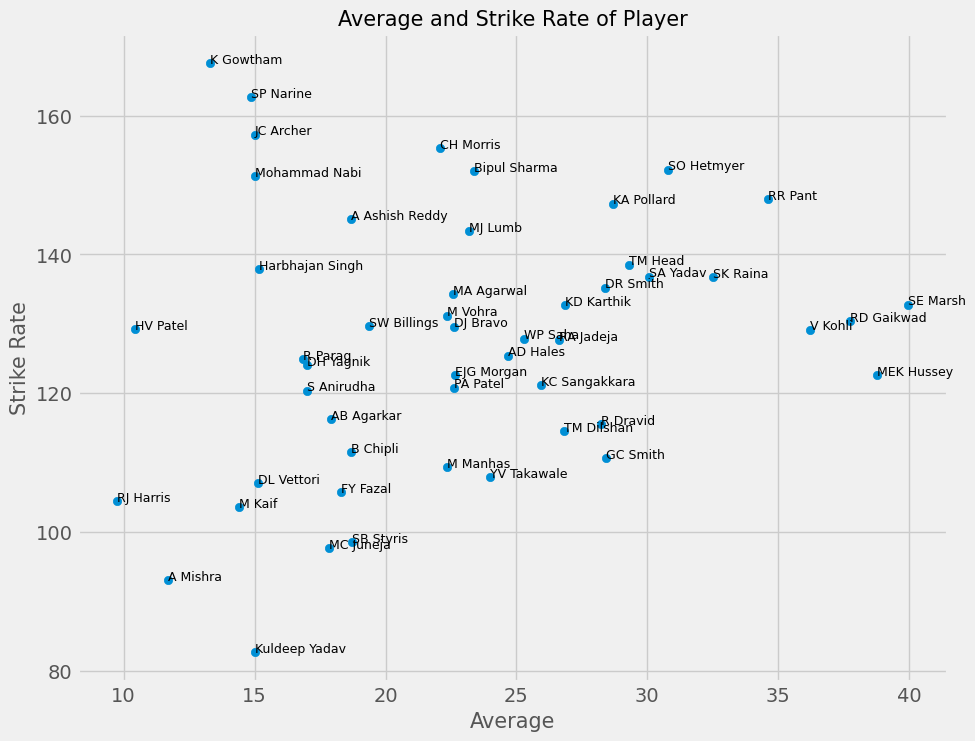

In [62]:
# Visualization of average vs strike-rate. (random 50 batsmen)  

plt.style.use('fivethirtyeight')  

temp_df = batsmans_data.head(250)
temp_df = temp_df.sample(n=50,random_state=1)

plt.figure(figsize=(10,8))

plt.scatter(temp_df['AVERAGE'],temp_df['STRIKE_RATE']) 

for val in range(temp_df.shape[0]): 
    
    plt.text(temp_df['AVERAGE'].values[val],temp_df['STRIKE_RATE'].values[val],temp_df['PLAYER_NAME'].values[val],fontdict={'size':9})
    
plt.title('Average and Strike Rate of Player', fontsize=15)
plt.xlabel('Average', fontsize=15)
plt.ylabel('Strike Rate', fontsize=15)
plt.show()      

In [63]:
# Orange cap winner in each IPL season.
# The orange cap is awarded to the batsman who scores the highest number of runs in a particular season. 

val1 = []
val2 = []
val3 = [] 

for val in season_list:
    
    temp = df[(df['Season']==val) & (df['innings'].isin([1,2]))]
    player = temp.groupby('batter')['batsman_run'].sum().sort_values(ascending=False).index[0]
    runs = temp.groupby('batter')['batsman_run'].sum().sort_values(ascending=False).values[0]
    
    val1.append(val)
    val2.append(player)
    val3.append(runs)   

orange_cap = pd.DataFrame({'SEASON':val1,'PLAYER_NAME':val2,'RUNS':val3})
orange_cap 

,SEASON,PLAYER_NAME,RUNS
0,2007/08,SE Marsh,616
1,2009,ML Hayden,572
2,2009/10,SR Tendulkar,618
3,2011,CH Gayle,608
4,2012,CH Gayle,733
5,2013,MEK Hussey,733
6,2014,RV Uthappa,660
7,2015,DA Warner,562
8,2016,V Kohli,973
9,2017,DA Warner,641


In [64]:
# Top five batsmen pair with most runs together in the IPL. (partnership) 

temp1 = df[df['innings'].isin([1,2])].groupby(['batter','non-striker'])['batsman_run'].sum().sort_values(ascending=False).head(20) 
temp2 = df[df['innings'].isin([1,2])].groupby(['non-striker','batter'])['batsman_run'].sum().sort_values(ascending=False).head(20).reset_index()
temp2.rename(columns={'non-striker':'batter','batter':'non-striker'}, inplace=True)
temp2 = temp2.set_index(['batter', 'non-striker'])['batsman_run']
temp = temp1 + temp2
temp_df = temp.sort_values(ascending=False).head(10).reset_index()
temp_df.drop_duplicates('batsman_run', inplace=True)  
temp_df['batsman_run'] = temp_df['batsman_run'].astype(int)
temp_df['Players'] = temp_df['batter'] + '-' + temp_df['non-striker']
temp_df.drop(['batter','non-striker'], axis=1, inplace=True)
temp_df = temp_df[['Players','batsman_run']] 
temp_df.rename(columns={'batsman_run':'Runs_Together'}, inplace=True)
temp_df 

,Players,Runs_Together
0,AB de Villiers-V Kohli,3029
2,CH Gayle-V Kohli,2635
4,DA Warner-S Dhawan,2242
6,G Gambhir-RV Uthappa,1795
8,KL Rahul-MA Agarwal,1664


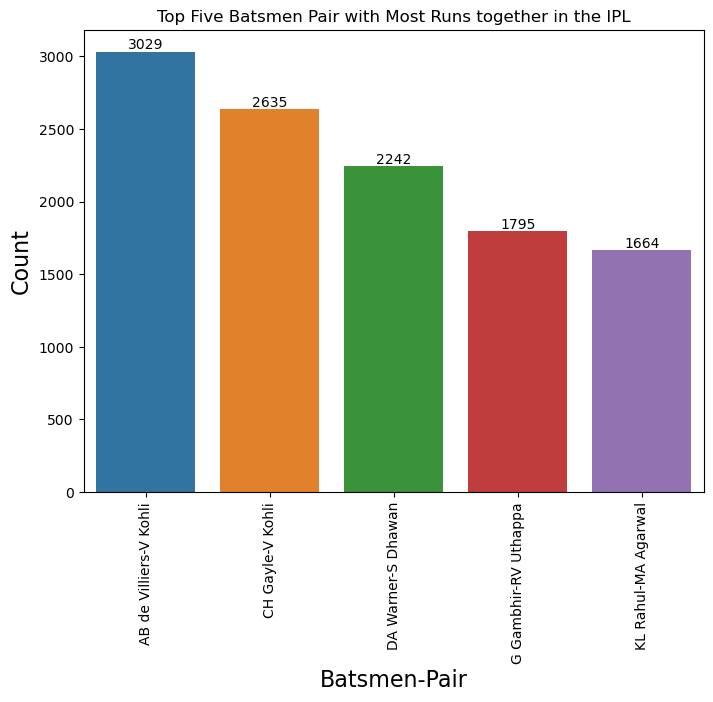

In [65]:
# Visualization of top five batsmen pair who has most runs together.  

plt.style.use('default') 

plt.figure(figsize=(8,6))

graph = sns.barplot(data=temp_df, x='Players', y='Runs_Together') 

for val in graph.containers:
    
    graph.bar_label(val) 

plt.title('Top Five Batsmen Pair with Most Runs together in the IPL') 
plt.xlabel('Batsmen-Pair', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(rotation='vertical')
plt.show()  

In [66]:
# This function provides detailed information about a batsman's IPL career, with statistics and milestones.

def find_data(val): 
    
    data_list = [] 
        
    matches = df1[df1['Team1Players'].str.contains(val)].shape[0] + df1[df1['Team2Players'].str.contains(val)].shape[0]
    runs = sum(df[(df['batter']==val) & (df['innings'].isin([1,2]))]['batsman_run']) 
    temp_df = df[(df['innings'].isin([1,2])) & (df['batter']==val)]
    ball_faced = (temp_df.shape[0]) - (temp_df[temp_df['extra_type']=='wides'].shape[0])
    out = df[(df['innings'].isin([1,2])) & (df['player_out']==val)].shape[0] 

    if out!=0:

        avg = round(runs/out,2)

    else:

        avg = 0 

    strike_rate = round((runs/ball_faced)*100,2)  
    fours = df[(df['batter']==val) & (df['innings'].isin([1,2])) & (df['batsman_run']==4) & (df['non_boundary']==0)].shape[0]
    sixes = df[(df['batter']==val) & (df['innings'].isin([1,2])) & (df['batsman_run']==6) & (df['non_boundary']==0)].shape[0]

    temp_list1 = [] 
    temp_list2 = [] 
    temp_list3 = [] 

    for data in season_list:

        high_score = 0
        fifty = 0

        try:

            high_score = df[(df['batter']==val) & (df['innings'].isin([1,2])) & (df['Season']==data)].groupby('MatchNumber')['batsman_run'].sum().sort_values(ascending=False).values[0]

            fifty = df[(df['batter']==val) & (df['innings'].isin([1,2])) & (df['Season']==data)].groupby('MatchNumber')['batsman_run'].sum()

            fifty = fifty[(fifty>=50) & (fifty<100)].shape[0]

            hundred = df[(df['batter']==val) & (df['innings'].isin([1,2])) & (df['Season']==data)].groupby('MatchNumber')['batsman_run'].sum()

            hundred = hundred[hundred>=100].shape[0] 

        except Exception:

            high_score = 0
            fifty = 0 
            hundred = 0

        temp_list1.append(high_score) 
        temp_list2.append(fifty)
        temp_list3.append(hundred) 

    high_score = max(temp_list1) 
    fifty = sum(temp_list2)
    hundred = sum(temp_list3) 
    
    data_list = data_list + [val, matches, runs, ball_faced, avg, strike_rate, fours, sixes, high_score, fifty, hundred] 
    
    return data_list 

In [67]:
# Pass the batsman's name as an input to the function, and the function will return the data.
# You can pass name from batsman_name list.  

data = find_data('AB de Villiers') 
index_list = ['PLAYER_NAME','MATCH_PLAYED','RUNS','BALLS_FACED','AVERAGE','STRIKE_RATE','FOURS','SIXES','HIGH_SCORE','50','100']
Player_Stats = pd.DataFrame({'INDEX':index_list,'DATA':data})

Player_Stats  

,INDEX,DATA
0,PLAYER_NAME,AB de Villiers
1,MATCH_PLAYED,183
2,RUNS,5162
3,BALLS_FACED,3403
4,AVERAGE,39.71
5,STRIKE_RATE,151.69
6,FOURS,413
7,SIXES,251
8,HIGH_SCORE,133
9,50,40


### Bowling / Bowler's Analysis.  

In [68]:
# Wicket types which count in bowler's wicket. 

wicket_type = ['caught','bowled','lbw','stumped','caught and bowled','hit wicket']  

In [69]:
# Top five bowlers with most wickets in the IPL.  

temp_df = df[df['kind'].isin(wicket_type)].groupby('bowler')['isWicketDelivery'].count().sort_values(ascending=False).head().reset_index()
temp_df.rename(columns={'bowler':'Bowler','isWicketDelivery':'Wickets'}, inplace=True)
temp_df

,Bowler,Wickets
0,DJ Bravo,183
1,SL Malinga,170
2,YS Chahal,166
3,A Mishra,166
4,R Ashwin,157


In [70]:
# Top bowlers list. 

bowler_name = df[(df['isWicketDelivery']==1) & (df['kind'].isin(wicket_type))]['bowler'].value_counts().sort_values(ascending=False).index[:5].to_list()
bowler_name

['DJ Bravo', 'SL Malinga', 'A Mishra', 'YS Chahal', 'R Ashwin']

In [71]:
# Number of wickets taken by the top five bowlers in each IPL season.  

top_bowlers = pd.DataFrame(columns=['A Mishra', 'DJ Bravo', 'R Ashwin', 'SL Malinga', 'YS Chahal']) 

bowler_name.sort() 

for val in season_list:
    
    players = []
    wickets = [] 
    
    players = df[(df['Season']==val) & (df['isWicketDelivery']==1) & (df['kind'].isin(wicket_type)) & (df['bowler'].isin(bowler_name))]['bowler'].value_counts().index[:5].to_list()
    wickets = df[(df['Season']==val) & (df['isWicketDelivery']==1) & (df['kind'].isin(wicket_type)) & (df['bowler'].isin(bowler_name))]['bowler'].value_counts().values[:5].tolist()
    
    combined_lists = list(zip(players,wickets))
    sorted_lists = sorted(combined_lists, key=lambda x: x[0])
    players, wickets = zip(*sorted_lists)

    players = list(players)
    wickets = list(wickets) 
    
    if len(bowler_name) != len(players):
        
        for temp in bowler_name:
            
            if temp not in players:
                
                if temp == 'A Mishra':
                    
                    wickets.insert(0,0) 
                
                elif temp == 'DJ Bravo':
                    
                    wickets.insert(1,0)
                
                elif temp == 'R Ashwin':
                    
                    wickets.insert(2,0)
                
                elif temp == 'SL Malinga':
                    
                    wickets.insert(3,0)
                
                elif temp == 'YS Chahal':
                    
                    wickets.insert(4,0) 
    
    len_df = len(top_bowlers) 
    
    top_bowlers.loc[len_df] = wickets   

top_bowlers.insert(0,'Season',season_list)

top_bowlers 

,Season,A Mishra,DJ Bravo,R Ashwin,SL Malinga,YS Chahal
0,2007/08,11,11,0,0,0
1,2009,14,11,2,18,0
2,2009/10,17,4,13,15,0
3,2011,19,6,20,28,0
4,2012,13,15,14,22,0
5,2013,21,32,15,20,0
6,2014,7,0,16,16,12
7,2015,9,26,10,24,23
8,2016,13,17,10,0,21
9,2017,10,0,0,11,14


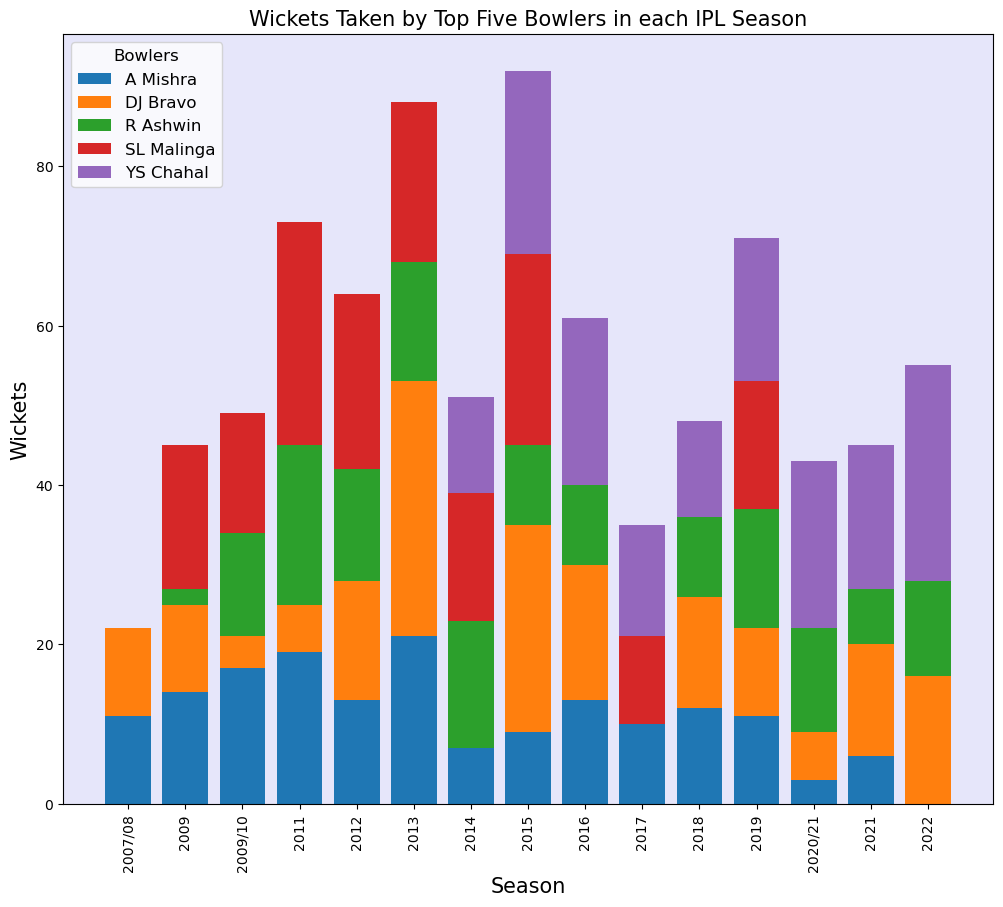

In [72]:
# Barchart to visualize the wickets taken by the top five bowlers in each IPL season. 

plt.style.use('default')  

plt.figure(figsize=(12,10))

plt.bar(top_bowlers['Season'],top_bowlers['A Mishra'],label='A Mishra') 
plt.bar(top_bowlers['Season'],top_bowlers['DJ Bravo'],bottom=top_bowlers['A Mishra'],label='DJ Bravo') 
plt.bar(top_bowlers['Season'],top_bowlers['R Ashwin'],bottom=(top_bowlers['A Mishra']+top_bowlers['DJ Bravo']),label='R Ashwin') 
plt.bar(top_bowlers['Season'],top_bowlers['SL Malinga'],bottom=(top_bowlers['A Mishra']+top_bowlers['DJ Bravo']+top_bowlers['R Ashwin']),label='SL Malinga') 
plt.bar(top_bowlers['Season'],top_bowlers['YS Chahal'],bottom=(top_bowlers['A Mishra']+top_bowlers['DJ Bravo']+top_bowlers['R Ashwin']+top_bowlers['SL Malinga']),label='YS Chahal') 

plt.title('Wickets Taken by Top Five Bowlers in each IPL Season', fontsize=15)
plt.xlabel('Season', fontsize=15)
plt.ylabel('Wickets', fontsize=15)
plt.gca().set_facecolor('lavender')
plt.xticks(rotation='vertical')
plt.legend(title='Bowlers', title_fontsize='large', fontsize='large', loc='upper left')
plt.show()  

In [73]:
# Top ten bowlers who have conceded the most extra runs in the IPL. 

temp_df = df[df['extra_type'].isin(['wides','noballs','penalty'])].groupby('bowler')['extras_run'].sum().sort_values(ascending=False).head(10).reset_index()
temp_df.rename(columns={'bowler':'Player_Name','extras_run':'Extra_Run_Count'}, inplace=True) 
temp_df 

,Player_Name,Extra_Run_Count
0,DJ Bravo,182
1,SL Malinga,177
2,B Kumar,153
3,R Ashwin,147
4,P Kumar,145
5,UT Yadav,141
6,I Sharma,119
7,DW Steyn,117
8,Mohammed Shami,115
9,SR Watson,111


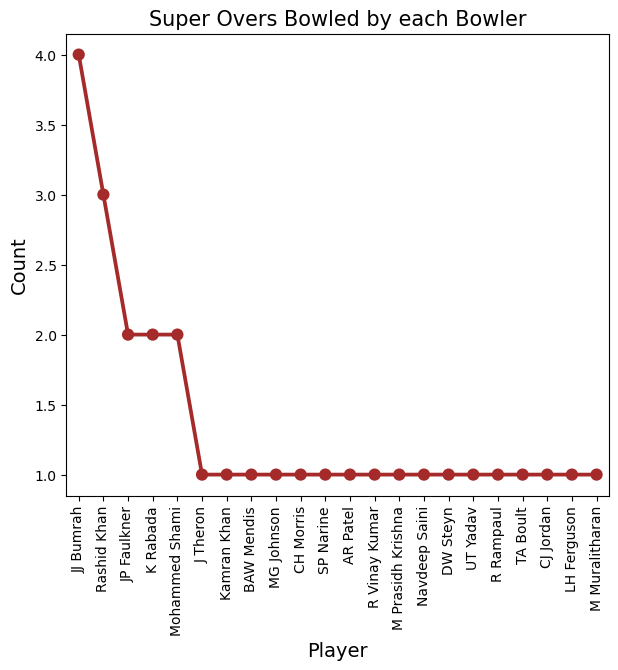

In [74]:
# Visualization of super overs bowled by each bowler in the IPL. 

SO_season_list = df[(df['SuperOver']=='Y') & (df['innings'].isin([3,4,5,6]))]['Season'].value_counts().index.tolist()

temp_df = pd.DataFrame()

for val in SO_season_list:
    
    new_df = pd.DataFrame()
    
    new_df = df[(df['SuperOver'] == 'Y') & (df['innings'].isin([3, 4, 5, 6])) & (df['Season'] == val)].groupby(['MatchNumber', 'bowler'])['ID'].count().reset_index()
    
    temp_df = pd.concat([temp_df, new_df], ignore_index=True)

temp_df = temp_df['bowler'].value_counts().reset_index()
temp_df.rename(columns={'index':'Bowler_Name','bowler':'No_of_SO'}, inplace=True) 

plt.figure(figsize=(7,6))  

sns.pointplot(data=temp_df, x='Bowler_Name', y='No_of_SO', color='brown') 

plt.title('Super Overs Bowled by each Bowler', fontsize=15)
plt.xlabel('Player', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation='vertical')
plt.show()   

In [75]:
# List of bowlers name. 

bowler_name = df['bowler'].unique().tolist()

bowler_name

['Mohammed Shami',
 'Yash Dayal',
 'LH Ferguson',
 'Rashid Khan',
 'HH Pandya',
 'R Sai Kishore',
 'TA Boult',
 'M Prasidh Krishna',
 'YS Chahal',
 'OC McCoy',
 'R Ashwin',
 'Mohammed Siraj',
 'JR Hazlewood',
 'GJ Maxwell',
 'Shahbaz Ahmed',
 'HV Patel',
 'PWH de Silva',
 'Mohsin Khan',
 'PVD Chameera',
 'KH Pandya',
 'Avesh Khan',
 'Ravi Bishnoi',
 'AS Joseph',
 'LS Livingstone',
 'Arshdeep Singh',
 'K Rabada',
 'NT Ellis',
 'Harpreet Brar',
 'B Kumar',
 'Washington Sundar',
 'Fazalhaq Farooqi',
 'J Suchith',
 'Umran Malik',
 'R Shepherd',
 'DR Sams',
 'HR Shokeen',
 'JJ Bumrah',
 'M Markande',
 'RP Meredith',
 'Ramandeep Singh',
 'KK Ahmed',
 'A Nortje',
 'SN Thakur',
 'MR Marsh',
 'Kuldeep Yadav',
 'AR Patel',
 'Mukesh Choudhary',
 'Simarjeet Singh',
 'MJ Santner',
 'M Pathirana',
 'MM Ali',
 'PH Solanki',
 'S Kaul',
 'MK Lomror',
 'UT Yadav',
 'TG Southee',
 'SP Narine',
 'CV Varun',
 'AD Russell',
 'N Rana',
 'JO Holder',
 'K Gowtham',
 'MP Stoinis',
 'R Sanjay Yadav',
 'T Nataraj

In [76]:
# Bowlers who have taken a five-wicket haul in the IPL. 

fifer_df = pd.DataFrame(columns=['PLAYER_NAME','5_Wickets_Haul']) 

for val1 in bowler_name:
    
    new_list = [] 
    count = 0 
    
    for val2 in season_list:
        
        temp_list = [] 
        
        temp_list = df[(df['innings'].isin([1,2])) & (df['Season']==val2) & (df['isWicketDelivery']==1) & (df['kind'].isin(wicket_type)) & (df['bowler']==val1)].groupby('ID')['MatchNumber'].count().values.tolist()
    
        temp_list = [x for x in temp_list if x >= 5] 
        
        count = count + len(temp_list) 
    
    if count > 0:
        
        new_list = new_list + [val1, count] 
    
        len_df = len(fifer_df)

        fifer_df.loc[len_df] = new_list 

fifer_df  

,PLAYER_NAME,5_Wickets_Haul
0,YS Chahal,1
1,HV Patel,1
2,PWH de Silva,1
3,AS Joseph,1
4,Arshdeep Singh,1
5,B Kumar,1
6,Umran Malik,1
7,JJ Bumrah,1
8,SP Narine,1
9,CV Varun,1


In [77]:
# Average and strike-rate of each bowler in the IPL. 

bowlers_data = pd.DataFrame(columns=['PLAYER_NAME', 'WICKETS', 'AVERAGE', 'STRIKE_RATE']) 

inclusive = ['legbyes','byes'] 

for val in bowler_name:
    
    temp_list = [] 
    
    wickets = df[(df['innings'].isin([1,2])) & (df['bowler']==val) & (df['isWicketDelivery']==1) & (df['kind'].isin(wicket_type))].shape[0] 
    
    runs_conceded = sum(df[(df['innings'].isin([1,2])) & (df['bowler']==val)]['total_run']) - sum(df[(df['innings'].isin([1,2])) & (df['bowler']==val) & (df['extra_type'].isin(['legbyes','byes']))]['total_run']) 
    
    balls = (df[(df['innings'].isin([1,2])) & (df['bowler']==val)].shape[0]) - (df[(df['innings'].isin([1,2])) & (df['bowler']==val) & (df['extra_type'].isin(['wides','noballs']))].shape[0]) 
    
    if wickets != 0:
        
        avg = round(runs_conceded/wickets,2)
    
    else:
        
        avg = 0
        
    if wickets != 0:
        
        strike_rate = round(balls/wickets,2)
    
    else:
        
        strike_rate = 0
    
    temp_list = temp_list + [val,wickets,avg,strike_rate]
    
    len_df = len(bowlers_data)
    
    bowlers_data.loc[len_df] = temp_list 

bowlers_data 

,PLAYER_NAME,WICKETS,AVERAGE,STRIKE_RATE
0,Mohammed Shami,99,29.19,20.57
1,Yash Dayal,11,26.91,17.45
2,LH Ferguson,36,29.86,21.25
3,Rashid Khan,112,20.83,19.60
4,HH Pandya,50,30.70,21.04
...,...,...,...,...
467,LPC Silva,0,0.00,0.00
468,D Kalyankrishna,2,43.50,24.00
469,SB Joshi,1,82.00,55.00
470,MA Khote,2,25.50,15.00


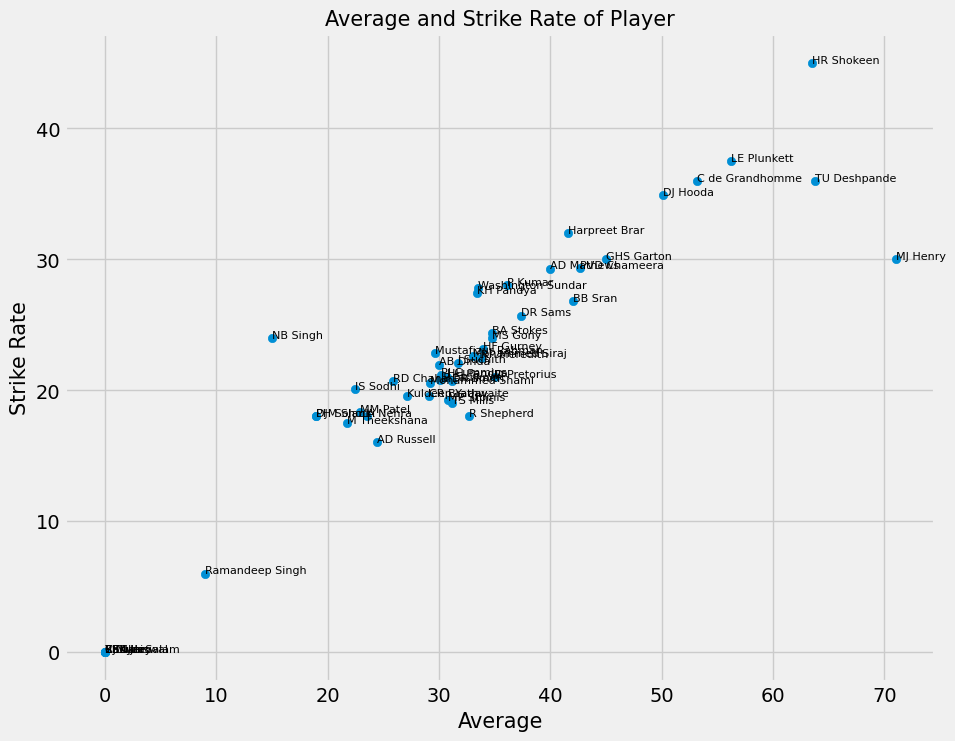

In [78]:
# Visualization of average vs strike-rate. (random 50 bowlers)  

temp_df = bowlers_data.head(250)
temp_df = temp_df.sample(n=50,random_state=1)

plt.style.use('fivethirtyeight')  

plt.figure(figsize=(10,8))

plt.scatter(temp_df['AVERAGE'],temp_df['STRIKE_RATE']) 

for val in range(temp_df.shape[0]): 
    
    plt.text(temp_df['AVERAGE'].values[val],temp_df['STRIKE_RATE'].values[val],temp_df['PLAYER_NAME'].values[val],fontdict={'size':8})
    
plt.title('Average and Strike Rate of Player', fontsize=15)
plt.xlabel('Average', fontsize=15)
plt.ylabel('Strike Rate', fontsize=15)
plt.show()     

In [79]:
# Purple cap winner in each IPL season. 
# The purple cap is awarded to the bowler who takes the highest number of wickets in a particular season. 

val1 = []
val2 = []
val3 = [] 

for val in season_list:
    
    player = ""
    wickets = 0 
    
    wicket_data = df[(df['innings'].isin([1,2])) & (df['isWicketDelivery']==1) & (df['Season']==val) & (df['kind'].isin(wicket_type))]  
    player = wicket_data.groupby('bowler')['isWicketDelivery'].sum().sort_values(ascending=False).index[0]
    wickets = wicket_data.groupby('bowler')['isWicketDelivery'].sum().sort_values(ascending=False).values[0] 
    
    val1.append(val)
    val2.append(player)
    val3.append(wickets)   

purple_cap = pd.DataFrame({'SEASON':val1,'PLAYER_NAME':val2,'WICEKTS':val3})  

purple_cap.sort_values('SEASON',inplace=True)  
purple_cap  

,SEASON,PLAYER_NAME,WICEKTS
0,2007/08,Sohail Tanvir,22
1,2009,RP Singh,23
2,2009/10,PP Ojha,21
3,2011,SL Malinga,28
4,2012,M Morkel,25
5,2013,DJ Bravo,32
6,2014,MM Sharma,23
7,2015,DJ Bravo,26
8,2016,B Kumar,23
9,2017,B Kumar,26


In [80]:
# This function provides detailed information about a bowler's IPL career, with statistics and milestones. 

def find_data(val):
    
    data_list = []
    
    matches = df1[df1['Team1Players'].str.contains(val)].shape[0] + df1[df1['Team2Players'].str.contains(val)].shape[0] 
    wickets = df[(df['innings'].isin([1,2])) & (df['bowler']==val) & (df['isWicketDelivery']==1) & (df['kind'].isin(wicket_type))].shape[0]
    balls = (df[(df['innings'].isin([1,2])) & (df['bowler']==val)].shape[0]) - (df[(df['innings'].isin([1,2])) & (df['bowler']==val) & (df['extra_type'].isin(['wides','noballs']))].shape[0])
    runs_conceded = sum(df[(df['innings'].isin([1,2])) & (df['bowler']==val)]['total_run']) - sum(df[(df['innings'].isin([1,2])) & (df['bowler']==val) & (df['extra_type'].isin(['legbyes','byes']))]['total_run']) 
    overs = balls//6
    economy = round(runs_conceded/overs,2) 
    wickets_all = wickets 
    
    if wickets != 0:
        
        avg = round(runs_conceded/wickets,2)
    
    else:
        
        avg = 0
        
    if wickets != 0:
        
        strike_rate = round(balls/wickets,2)
    
    else:
        
        strike_rate = 0
        
    count1 = 0 
    count2 = 0
    wickets = []
    runs = [] 
    
    for val2 in season_list:
        
        temp_list1 = [] 
        
        temp_list1 = df[(df['innings'].isin([1,2])) & (df['Season']==val2) & (df['isWicketDelivery']==1) & (df['kind'].isin(wicket_type)) & (df['bowler']==val)].groupby('ID')['MatchNumber'].count().values.tolist()
    
        temp_list1 = [x for x in temp_list1 if x >= 5] 
        
        count1 = count1 + len(temp_list1) 
        
        temp_list2 = [] 
        
        temp_list2 = df[(df['innings'].isin([1,2])) & (df['Season']==val2) & (df['isWicketDelivery']==1) & (df['kind'].isin(wicket_type)) & (df['bowler']==val)].groupby('ID')['MatchNumber'].count().values.tolist()
    
        temp_list2 = [x for x in temp_list2 if x == 4] 
        
        count2 = count2 + len(temp_list2) 
        
        data1 = pd.Series(dtype=int)
        data2 = pd.Series(dtype=int) 

        data1 = df[(df['innings'].isin([1,2])) & (df['Season']==val2) & (df['isWicketDelivery']==1) & (df['kind'].isin(wicket_type)) & (df['bowler']==val)].groupby('ID')['MatchNumber'].count()
        data2 = df[(df['innings'].isin([1,2])) & (df['Season']==val2) & (df['bowler']==val)].groupby('ID')['total_run'].sum()

        if data2.shape[0]!=0:

            extra_runs = df[(df['innings'].isin([1,2])) & (df['Season']==val2) & (df['bowler']==val) & (df['total_run']!=0) & (df['extra_type'].isin(['legbyes','byes']))].groupby('ID')['total_run'].sum()
            index_val = data2.index.tolist()
            values_val1 = data2.values.tolist()
            result_combined = extra_runs.combine_first(data2)
            result_combined = result_combined.astype(int)
            values_val2 = result_combined.values.tolist() 
            new_list = [] 

            for i in range(len(values_val1)):

                if values_val1[i] != values_val2[i]:

                    new = values_val1[i] - values_val2[i] 

                else:

                    new = values_val1[i]

                new_list.append(new)  

            data2 = pd.Series(new_list, index=index_val) 

        data = data1 + data2 
        data.dropna(inplace=True)
        data2 = data - data1 
        data2 = data2.astype(int) 
        data1 = data1.values.tolist()
        data2 = data2.values.tolist()

        wickets = wickets + data1 
        runs = runs + data2 
    
    max_val = max(wickets) 
    runs_count = [] 

    for i in range(len(wickets)):

        if wickets[i] == max_val:

            runs_count.append(runs[i]) 

    min_val = min(runs_count) 

    ans = str(max_val)+'/'+str(min_val)  
    
    data_list = data_list + [val,matches,wickets_all,balls,overs,economy,avg,strike_rate,count1,count2,ans] 
    
    return data_list  

In [81]:
# Pass the bowler's name as an input to the function, and the function will return the data.
# You can pass name from bowler_name list. 

data = find_data('Harbhajan Singh') 
index_list = ['PLAYER_NAME','MATCH_PLAYED','WICKETS','BALLS_BOWLED','OVERS','ECONOMY','AVERAGE','STRIKE_RATE','5Wh','4Wh','HIGH_SCORE']
Player_Stats = pd.DataFrame({'INDEX':index_list,'DATA':data})

Player_Stats  

,INDEX,DATA
0,PLAYER_NAME,Harbhajan Singh
1,MATCH_PLAYED,163
2,WICKETS,150
3,BALLS_BOWLED,3416
4,OVERS,569
5,ECONOMY,7.08
6,AVERAGE,26.87
7,STRIKE_RATE,22.77
8,5Wh,1
9,4Wh,1


### Fielding / Fielder Analysis. 

In [86]:
# Catches, Stumpings, Runouts.

In [87]:
# Total number of catches taken in the IPL. 

temp_val = df[(df['innings'].isin([1,2])) & (df['kind'].isin(['caught','caught and bowled']))].shape[0]

print("\033[1m", 'Catches taken in the IPL:', temp_val) 

 Catches taken in the IPL: 7150


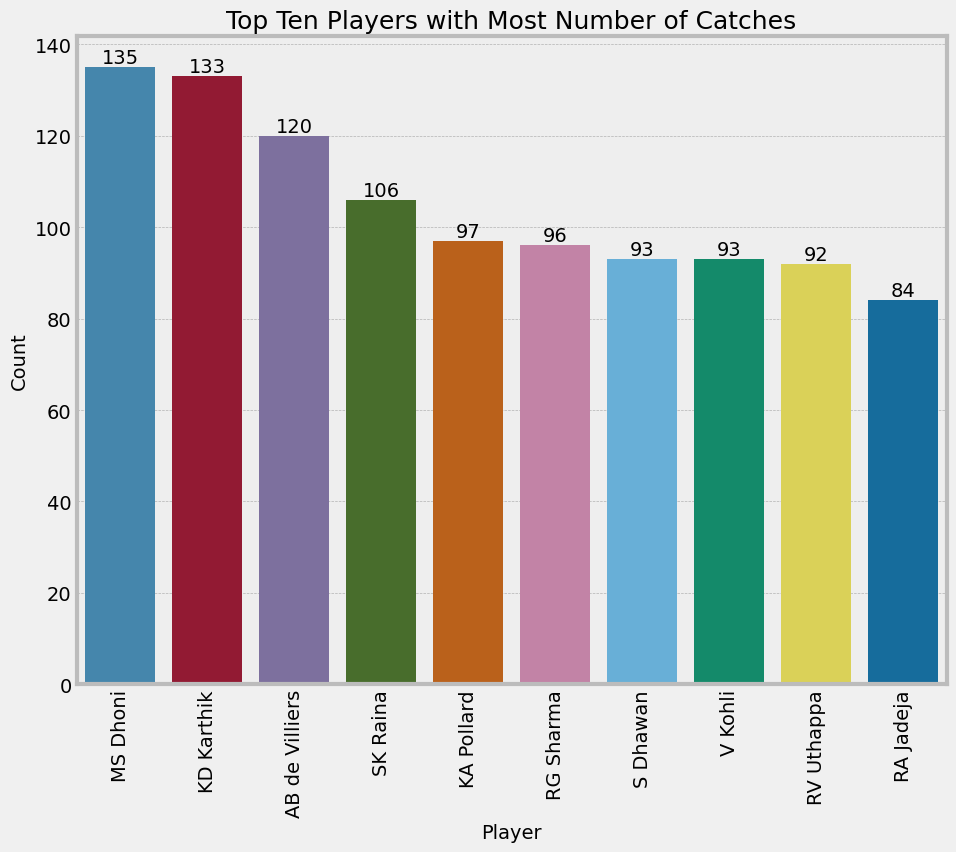

In [88]:
# Visualization of the top ten players with the most catches in the IPL.  

temp_df = df[(df['innings'].isin([1,2])) & (df['kind'].isin(['caught','caught and bowled']))].groupby('fielders_involved')['ID'].count().sort_values(ascending=False).head(10).reset_index()
temp_df.rename(columns={'fielders_involved':'Fielder_Name','ID':'No_of_Catches'}, inplace=True)  
temp_df

plt.style.use('bmh')  

plt.figure(figsize=(10,8))

graph = sns.barplot(data=temp_df, x='Fielder_Name', y='No_of_Catches') 

for val in graph.containers:
    
    graph.bar_label(val) 

plt.title('Top Ten Players with Most Number of Catches', fontsize=18)
plt.xlabel('Player', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation='vertical')
plt.show()    

In [89]:
# Total number of stumpings in the IPL.  

temp_val = df[(df['innings'].isin([1,2])) & (df['kind'].isin(['stumped']))].shape[0]

print("\033[1m", 'Stumpings in the IPL:', temp_val)

 Stumpings in the IPL: 325


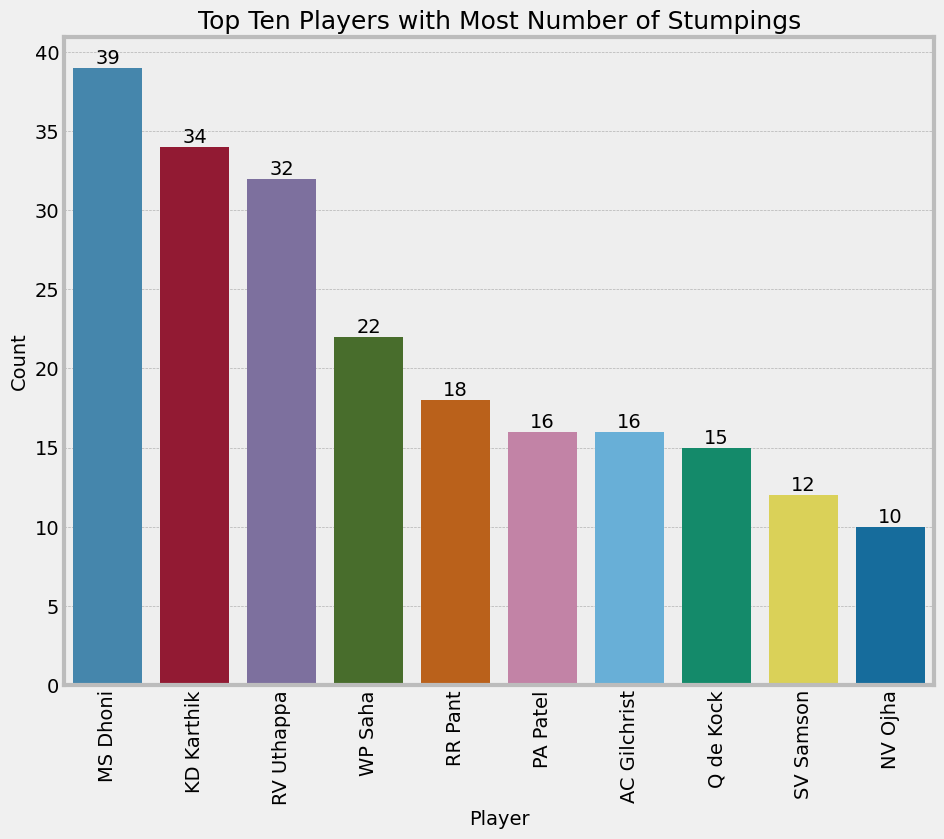

In [90]:
# Visualization of the top ten players with the most stumpings in the IPL.   

temp_df = df[(df['innings'].isin([1,2])) & (df['kind'].isin(['stumped']))].groupby('fielders_involved')['ID'].count().sort_values(ascending=False).head(10).reset_index()
temp_df.rename(columns={'fielders_involved':'Fielder_Name','ID':'No_of_Stumpings'}, inplace=True)  
temp_df

plt.style.use('bmh')  

plt.figure(figsize=(10,8))

graph = sns.barplot(data=temp_df, x='Fielder_Name', y='No_of_Stumpings') 

for val in graph.containers:
    
    graph.bar_label(val) 

plt.title('Top Ten Players with Most Number of Stumpings', fontsize=18)
plt.xlabel('Player', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation='vertical')
plt.show()   

In [91]:
# Total number of runouts in the IPL.   

temp_val = df[(df['innings'].isin([1,2])) & (df['kind'].isin(['run out']))].shape[0]  

print("\033[1m", 'Runouts in the IPL:', temp_val) 

 Runouts in the IPL: 1000


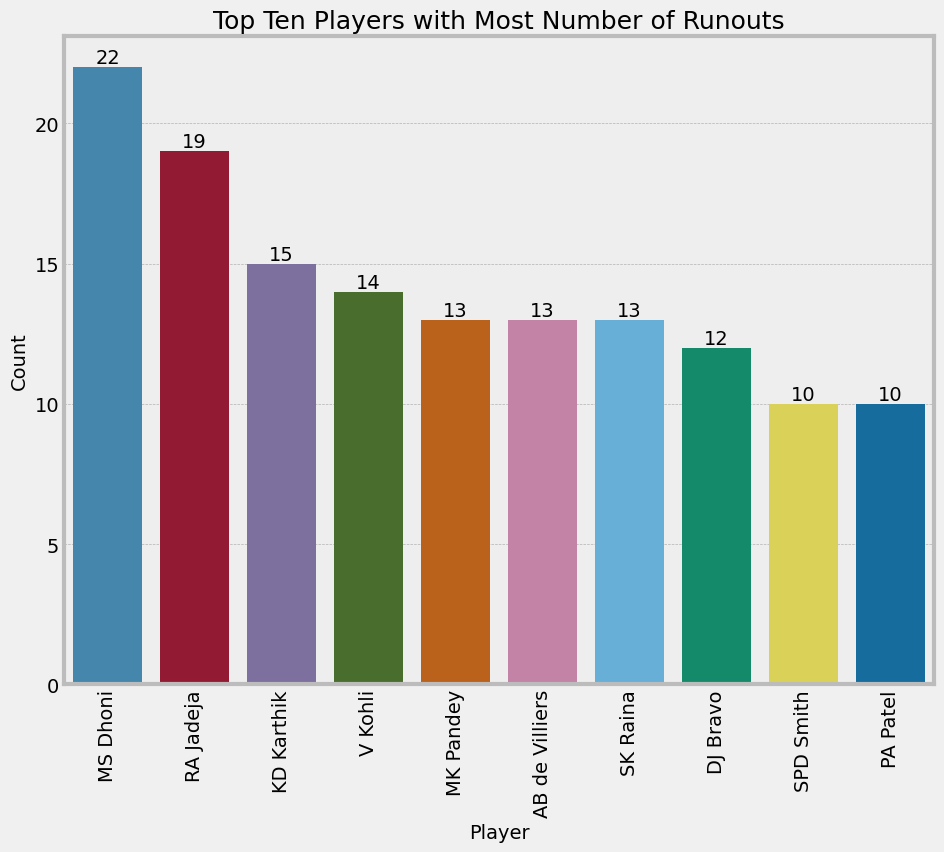

In [92]:
# Visualization of the top ten players with the most runouts in the IPL. 

temp_df = df[(df['innings'].isin([1,2])) & (df['kind'].isin(['run out']))].groupby('fielders_involved')['ID'].count().sort_values(ascending=False).head(10).reset_index()
temp_df.rename(columns={'fielders_involved':'Fielder_Name','ID':'No_of_RunOuts'}, inplace=True)  
temp_df

plt.style.use('bmh')  

plt.figure(figsize=(10,8))

graph = sns.barplot(data=temp_df, x='Fielder_Name', y='No_of_RunOuts') 

for val in graph.containers:
    
    graph.bar_label(val) 

plt.title('Top Ten Players with Most Number of Runouts', fontsize=18)
plt.xlabel('Player', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation='vertical')
plt.show()   

### Teams Analysis. 

In [93]:
# Creating new column as 'BowlingTeam'. 

data_df = df
data_df['BowlingTeam'] = data_df.apply(lambda x: x['Team2'] if x['BattingTeam']==x['Team1'] else x['Team1'], axis=1) 

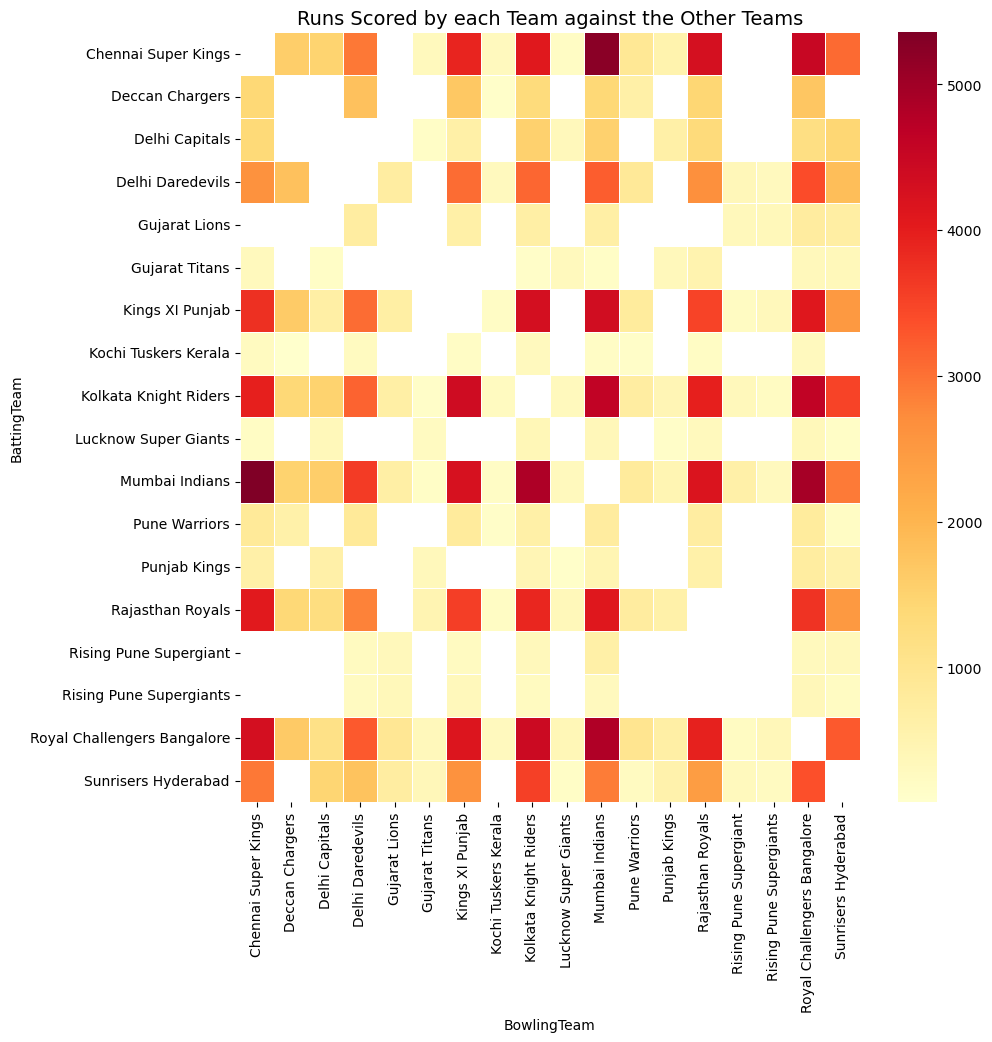

In [94]:
# Visualization of runs scored by each team against the other.   

plt.style.use('default')  

temp_df = data_df.pivot_table(index='BattingTeam', columns='BowlingTeam', values='total_run', aggfunc='sum')

plt.figure(figsize=(10,10))

sns.heatmap(data=temp_df, linewidths=0.5, cmap='YlOrRd') 

plt.title('Runs Scored by each Team against the Other Teams', fontsize=14)
plt.show()  

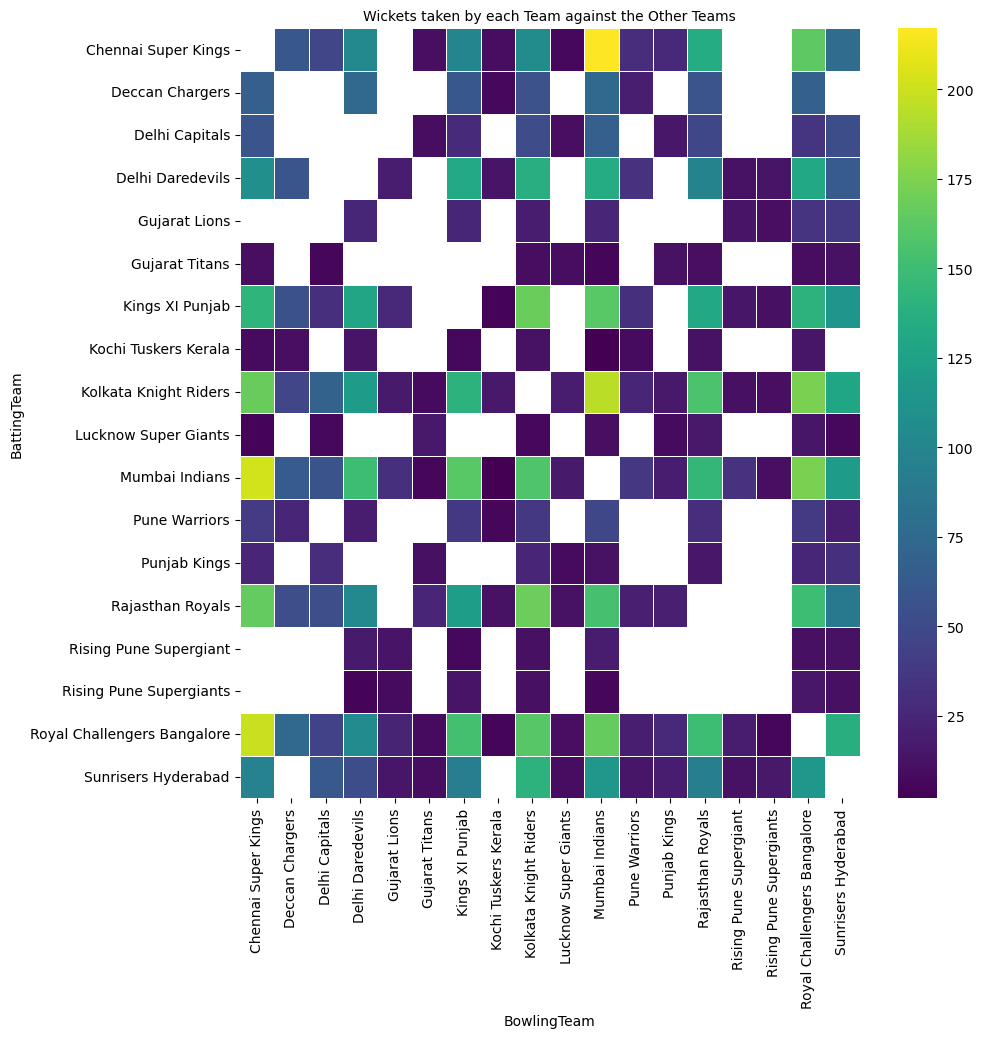

In [95]:
# Visualization of wickets taken by each team against the other.    

plt.style.use('default')   

temp_df = data_df[data_df['isWicketDelivery']==1].pivot_table(index='BattingTeam', columns='BowlingTeam', values='isWicketDelivery', aggfunc='count')

plt.figure(figsize=(10,10))

sns.heatmap(data=temp_df, linewidths=0.5, cmap='viridis') 

plt.title('Wickets taken by each Team against the Other Teams', fontsize=10)
plt.show()  

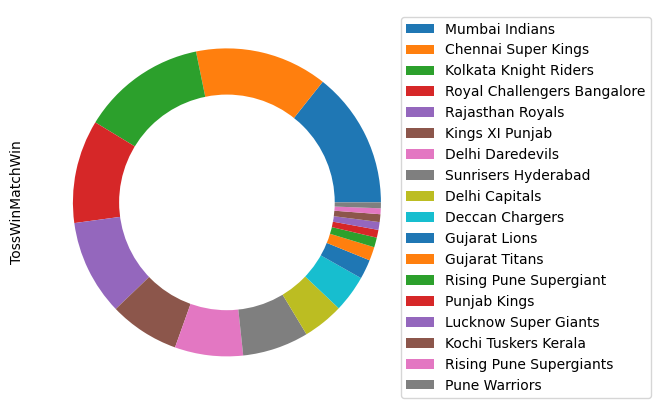

In [96]:
# Visualization of teams with the best ratio of toss wins to match wins.

data_df = df1
data_df['TossWinMatchWin'] = data_df.apply(lambda x: x['TossWinner'] if x['TossWinner']==x['WinningTeam'] else np.nan, axis=1) 

plt.figure(figsize=(8,5))

data_df['TossWinMatchWin'].value_counts().plot(kind='pie', labels=None) 
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle) 
plt.legend(data_df['TossWinMatchWin'].value_counts().index, loc='upper right', bbox_to_anchor=(1.62, 1))
plt.show()  

In [97]:
# Top five teams that have played the most number of matches in qualifiers.

temp_list = [] 

for name, values in df['MatchNumber'].iteritems():
  
    if values.isnumeric():
        
        continue 
    
    else:
        
        temp_list.append(values)
        
temp_list = list(set(temp_list)) 

temp_list

temp_df = df1[df1['MatchNumber'].isin(temp_list)] 

Team_count = temp_df['Team1'].value_counts() + temp_df['Team2'].value_counts()

Team_count = Team_count.sort_values(ascending=False).head().reset_index() 
Team_count.rename(columns={'index':'Team_Name',0:'Number_of_Matches'}, inplace=True)
Team_count['Number_of_Matches'] = Team_count['Number_of_Matches'].astype(int)
Team_count 

,Team_Name,Number_of_Matches
0,Chennai Super Kings,24
1,Mumbai Indians,18
2,Royal Challengers Bangalore,15
3,Kolkata Knight Riders,13
4,Sunrisers Hyderabad,11


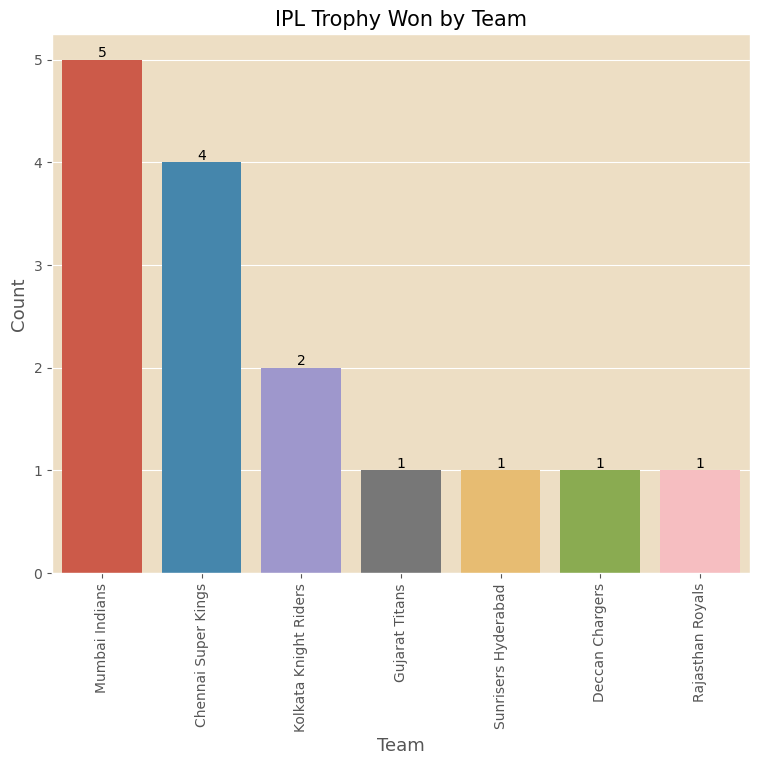

In [98]:
# Visualization of IPL trophies won by each team.

temp_df = df1[df1['MatchNumber']=='Final']['WinningTeam'].value_counts().reset_index()
temp_df.rename(columns={'index':'Team','WinningTeam':'IPL_Trophy'}, inplace=True)

plt.style.use('ggplot')  
plt.figure(figsize=(9,7))

graph = sns.barplot(data=temp_df, x='Team', y='IPL_Trophy') 

for val in graph.containers:
    
    graph.bar_label(val) 

plt.title('IPL Trophy Won by Team', fontsize=15)
plt.xlabel('Team', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.xticks(rotation='vertical') 
plt.gca().set_facecolor('#EDDEC4')
plt.show()  

### Feature Engineering.  

In [99]:
# To keeping it clean, importing the data again.
# IPL_Matches_2008_2022 dataset in df1.
# IPL_Ball_by_Ball_2008_2022 dataset in df2

df1 = pd.read_csv(r"C:\Users\rohit\OneDrive\Desktop\DOCUMENTATION_AND_IPL_DATASET\IPL_Matches_2008_2022.csv")  
df2 = pd.read_csv(r"C:\Users\rohit\OneDrive\Desktop\DOCUMENTATION_AND_IPL_DATASET\IPL_Ball_by_Ball_2008_2022.csv")  

df1.loc[(df1['City'].isnull()) & (df1['Venue'] == 'Dubai International Cricket Stadium'), 'City'] = 'Dubai'
df1.loc[(df1['City'].isnull()) & (df1['Venue'] == 'Sharjah Cricket Stadium'), 'City'] = 'Sharjah'   

In [100]:
# df1 overview.

df1.sample(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
213,1178416,Chennai,2019-04-23,2019,41,Sunrisers Hyderabad,Chennai Super Kings,MA Chidambaram Stadium,Chennai Super Kings,field,N,Chennai Super Kings,Wickets,6.0,NaN,SR Watson,"['DA Warner', 'JM Bairstow', 'MK Pandey', 'V S...","['SR Watson', 'F du Plessis', 'SK Raina', 'AT ...",AK Chaudhary,NJ Llong
893,336039,Mumbai,2008-05-31,2007/08,Semi Final,Chennai Super Kings,Kings XI Punjab,Wankhede Stadium,Kings XI Punjab,bat,N,Chennai Super Kings,Wickets,9.0,NaN,M Ntini,"['PA Patel', 'S Vidyut', 'SK Raina', 'MS Dhoni...","['SE Marsh', 'JR Hopes', 'KC Sangakkara', 'Yuv...",Asad Rauf,DJ Harper


In [101]:
# df2 overview.

df2.sample(2)  

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
216328,336023,1,9,1,GC Smith,V Kohli,SA Asnodkar,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
84863,1082609,1,10,6,NV Ojha,KC Cariappa,DA Warner,NaN,0,0,0,0,0,NaN,NaN,NaN,Sunrisers Hyderabad


In [102]:
# Creating new feature called 'Target'. 

# The target is the number of runs a team needs to score to win a match. 
# The team that bats first sets this target in the first innings, 
# and the other team tries to score more runs than that to win in the second innings. 

target_df = df2[df2['innings']==1].groupby('ID')['total_run'].sum().reset_index()
target_df.rename(columns={'total_run':'Target'}, inplace=True)
target_df['Target'] = target_df['Target'] + 1
target_df 

,ID,Target
0,335982,223
1,335983,241
2,335984,130
3,335985,166
4,335986,111
...,...,...
945,1304116,158
946,1312197,189
947,1312198,208
948,1312199,158


In [103]:
# Merging target variable with df1 and storing it into temp_df1. 

temp_df1 = df1.merge(target_df, left_on='ID', right_on='ID')  
temp_df1.sample(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,Target
658,548352,Chennai,2012-05-04,2012,46,Chennai Super Kings,Deccan Chargers,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,bat,...,Chennai Super Kings,Runs,10.0,NaN,SK Raina,"['F du Plessis', 'M Vijay', 'SK Raina', 'MS Dh...","['PA Patel', 'S Dhawan', 'CL White', 'KC Sanga...",HDPK Dharmasena,BNJ Oxenford,161
7,1304113,Mumbai,2022-05-19,2022,67,Gujarat Titans,Royal Challengers Bangalore,"Wankhede Stadium, Mumbai",Gujarat Titans,bat,...,Royal Challengers Bangalore,Wickets,8.0,NaN,V Kohli,"['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...","['V Kohli', 'F du Plessis', 'GJ Maxwell', 'KD ...",KN Ananthapadmanabhan,GR Sadashiv Iyer,169


In [104]:
# List of all the teams that have participated in the IPL till now.

temp_df1['Team1'].unique().tolist()  

['Rajasthan Royals',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad',
 'Delhi Capitals',
 'Chennai Super Kings',
 'Gujarat Titans',
 'Lucknow Super Giants',
 'Kolkata Knight Riders',
 'Punjab Kings',
 'Mumbai Indians',
 'Kings XI Punjab',
 'Delhi Daredevils',
 'Rising Pune Supergiant',
 'Gujarat Lions',
 'Rising Pune Supergiants',
 'Pune Warriors',
 'Deccan Chargers',
 'Kochi Tuskers Kerala']

In [105]:
# In the IPL, some teams have changed their names after a few seasons.
# 1. 'Deccan Chargers' changed their name to 'Sunrisers Hyderabad'.
# 2. 'Delhi Daredevils' changed their name to 'Delhi Capitals'.
# 3. 'Kings XI Punjab' changed their name to 'Punjab Kings'. 
# Here, replacing team's old name with their new name in the temp_df1. 

temp_df1['Team1'] = temp_df1['Team1'].replace('Deccan Chargers','Sunrisers Hyderabad') 
temp_df1['Team2'] = temp_df1['Team2'].replace('Deccan Chargers','Sunrisers Hyderabad')

temp_df1['Team1'] = temp_df1['Team1'].replace('Delhi Daredevils','Delhi Capitals') 
temp_df1['Team2'] = temp_df1['Team2'].replace('Delhi Daredevils','Delhi Capitals')

temp_df1['Team1'] = temp_df1['Team1'].replace('Kings XI Punjab','Punjab Kings') 
temp_df1['Team2'] = temp_df1['Team2'].replace('Kings XI Punjab','Punjab Kings')  

temp_df1['WinningTeam'] = temp_df1['WinningTeam'].replace('Deccan Chargers','Sunrisers Hyderabad')
temp_df1['WinningTeam'] = temp_df1['WinningTeam'].replace('Delhi Daredevils','Delhi Capitals')
temp_df1['WinningTeam'] = temp_df1['WinningTeam'].replace('Kings XI Punjab','Punjab Kings')  

In [106]:
# Teams that have participated in all the IPL seasons.

team_list = ['Rajasthan Royals',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad',
 'Delhi Capitals',
 'Chennai Super Kings',
 'Kolkata Knight Riders',
 'Punjab Kings',
 'Mumbai Indians']  

In [107]:
# Keeping the data of only those teams that have participated in all the seasons of the IPL in temp_df1.

temp_df1 = temp_df1.loc[temp_df1['Team1'].isin(team_list)] 
temp_df1 = temp_df1.loc[temp_df1['Team2'].isin(team_list)]   

In [108]:
# 'Team1' column of temp_df1. 

temp_df1['Team1'].value_counts()

Royal Challengers Bangalore    115
Delhi Capitals                 105
Chennai Super Kings            104
Punjab Kings                   102
Mumbai Indians                 101
Sunrisers Hyderabad            100
Kolkata Knight Riders           98
Rajasthan Royals                81
Name: Team1, dtype: int64

In [109]:
# 'Team2' column of temp_df1. 

temp_df1['Team2'].value_counts() 

Mumbai Indians                 110
Sunrisers Hyderabad            108
Kolkata Knight Riders          107
Delhi Capitals                 100
Rajasthan Royals                99
Punjab Kings                    98
Chennai Super Kings             93
Royal Challengers Bangalore     91
Name: Team2, dtype: int64

In [110]:
# 'WinningTeam' column of temp_df1. 

temp_df1['WinningTeam'].value_counts()  

Mumbai Indians                 121
Chennai Super Kings            116
Kolkata Knight Riders          106
Delhi Capitals                  94
Royal Challengers Bangalore     94
Punjab Kings                    92
Sunrisers Hyderabad             91
Rajasthan Royals                89
Name: WinningTeam, dtype: int64

In [111]:
# There are only fifteen matches decided by the 'DLS' method.

# DLS method in cricket is a mathematical formula used to adjust target scores,
# if match affected by rain or some other reason.

temp_df1['method'].value_counts() 

D/L    15
Name: method, dtype: int64

In [112]:
# So, in matches decided by the DLS method, one inning didn't complete properly. 
# Therefore, dropping the data where matches decided by DLS method. 

temp_df1 = temp_df1[temp_df1['method'].isnull()]  

In [113]:
# There are only thirteen matches decided by the SuperOver.

# When a match ends in a draw, it is decided by playing one extra over, which is called a super over.

temp_df1['SuperOver'].value_counts() 

N    775
Y     13
Name: SuperOver, dtype: int64

In [114]:
# Superover is not regular type to decided match winner. 
# Therefore, dropping the data where match winner decided by SuperOver. 

temp_df1 = temp_df1[temp_df1['SuperOver']=='N'] 

In [115]:
# After some changes in temp_df1, basic infomartion. 

temp_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775 entries, 1 to 949
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               775 non-null    int64  
 1   City             775 non-null    object 
 2   Date             775 non-null    object 
 3   Season           775 non-null    object 
 4   MatchNumber      775 non-null    object 
 5   Team1            775 non-null    object 
 6   Team2            775 non-null    object 
 7   Venue            775 non-null    object 
 8   TossWinner       775 non-null    object 
 9   TossDecision     775 non-null    object 
 10  SuperOver        775 non-null    object 
 11  WinningTeam      775 non-null    object 
 12  WonBy            775 non-null    object 
 13  Margin           775 non-null    float64
 14  method           0 non-null      object 
 15  Player_of_Match  775 non-null    object 
 16  Team1Players     775 non-null    object 
 17  Team2Players    

In [116]:
# temp_df1 overview. 

temp_df1.sample(2) 

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,Target
740,501234,Kolkata,2011-04-30,2011,37,Kolkata Knight Riders,Punjab Kings,Eden Gardens,Kolkata Knight Riders,field,...,Kolkata Knight Riders,Wickets,8.0,NaN,Iqbal Abdulla,"['JH Kallis', 'EJG Morgan', 'G Gambhir', 'MK T...","['AC Gilchrist', 'PC Valthaty', 'SE Marsh', 'K...",AM Saheba,SL Shastri,120
481,829727,Visakhapatnam,2015-04-16,2015,11,Sunrisers Hyderabad,Rajasthan Royals,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Rajasthan Royals,field,...,Rajasthan Royals,Wickets,6.0,NaN,AM Rahane,"['DA Warner', 'S Dhawan', 'KL Rahul', 'NV Ojha...","['AM Rahane', 'SV Samson', 'SPD Smith', 'KK Na...",PG Pathak,S Ravi,128


In [117]:
# Here, replacing team's old name with their new name in the df2. 

df2['BattingTeam'] = df2['BattingTeam'].replace('Deccan Chargers','Sunrisers Hyderabad')
df2['BattingTeam'] = df2['BattingTeam'].replace('Delhi Daredevils','Delhi Capitals')
df2['BattingTeam'] = df2['BattingTeam'].replace('Kings XI Punjab','Punjab Kings')   

In [118]:
# Keeping the data of only those teams that have participated in all the seasons of the IPL in df2. 

df2 = df2.loc[df2['BattingTeam'].isin(team_list)]  

In [119]:
# Merging df2 with temp_df1 and storing it into temp_df2. 

temp_df2 = temp_df1.merge(df2, on='ID') 
temp_df2.sample(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
49122,1175369,Jaipur,2019-04-02,2019,14,Royal Challengers Bangalore,Rajasthan Royals,Sawai Mansingh Stadium,Rajasthan Royals,field,...,NaN,2,0,2,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
17220,1254096,Abu Dhabi,2021-09-23,2021,34,Mumbai Indians,Kolkata Knight Riders,"Zayed Cricket Stadium, Abu Dhabi",Kolkata Knight Riders,field,...,NaN,6,0,6,0,0,NaN,NaN,NaN,Kolkata Knight Riders


In [120]:
# Creating new feature called 'BowlingTeam'. 

temp_df2['BowlingTeam'] = temp_df2.apply(lambda x: x['Team2'] if x['BattingTeam']==x['Team1'] else x['Team1'], axis=1)    

In [121]:
# Dropping all unnecessary columns from temp_df2. 

temp_df2.drop(['Date','Season','MatchNumber','Venue','TossWinner','TossDecision','SuperOver','WonBy','Margin','method','Player_of_Match','Team1Players','Team2Players','Umpire1','Umpire2','Team1','Team2'], axis=1, inplace=True) 

In [122]:
# Remaining columns of temp_df2, basic information. 

temp_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185670 entries, 0 to 185669
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ID                 185670 non-null  int64 
 1   City               185670 non-null  object
 2   WinningTeam        185670 non-null  object
 3   Target             185670 non-null  int64 
 4   innings            185670 non-null  int64 
 5   overs              185670 non-null  int64 
 6   ballnumber         185670 non-null  int64 
 7   batter             185670 non-null  object
 8   bowler             185670 non-null  object
 9   non-striker        185670 non-null  object
 10  extra_type         9962 non-null    object
 11  batsman_run        185670 non-null  int64 
 12  extras_run         185670 non-null  int64 
 13  total_run          185670 non-null  int64 
 14  non_boundary       185670 non-null  int64 
 15  isWicketDelivery   185670 non-null  int64 
 16  player_out         9

In [123]:
# Keeping the data of the second innings as the model will predict the winner using the data from the second innings. 

# After team1 finishes batting, team2 takes its turn. 
# The second inning is when team2 chases the target set by team1 in the first innings.

temp_df2 = temp_df2[temp_df2['innings']==2]  

In [124]:
# Creating a copy of temp_df2.

temp_df2 = temp_df2.copy() 

In [125]:
# Creating new feature called 'current_score'. 

# Current batting score means the number of runs scored by the batting team till the current ball.

temp_df2['current_score'] = temp_df2.groupby('ID')['total_run'].cumsum()   

In [126]:
# Creating new feature called 'runs_left_temp'. 

# Runs left meaning is after scoring a certain number of runs, the remaining runs that the team needs to reach the target.

temp_df2['runs_left_temp'] = temp_df2['Target'] - temp_df2['current_score'] 

In [127]:
# Fixing bugs in the 'runs_left_temp' column and creating new feature called 'runs_left'. 

temp_df2['runs_left'] = temp_df2.apply(lambda x: x['runs_left_temp'] if x['runs_left_temp']>=0 else 0, axis=1)   

In [128]:
# Creating new feature called 'extra_type_modified'. 
# 'extra_type_modified' column contains null values where balls bowled are legal deliveries. 
# Filling nan values in the column with 'not an extra'.

temp_df2['extra_type_modified'] = temp_df2['extra_type'] 
temp_df2['extra_type_modified'].fillna('not an extra', inplace=True)  

In [129]:
# Legally, there are only six balls in an over. 
# In the 'ballnumber' column data incorrectly counts extra balls as ball numbers, that's why is not accurate. 

temp_df2['ballnumber'].value_counts()  

1     14663
2     14591
3     14523
4     14453
5     14364
6     14277
7      2588
8       421
9        64
10        7
Name: ballnumber, dtype: int64

In [130]:
# Sorting the dataframe 'temp_df2' in descending order based on the 'ID' column  to identify patterns, 
# which is necessary for specific operations. 

temp_df2 = temp_df2.sort_values(['ID','overs'], ascending=[False,True]) 

temp_list = temp_df2['ID'].to_list()
check_sort = temp_list == sorted(temp_list, reverse=True)
print(check_sort)  

True


In [131]:
# Fixing bugs in the 'ballnumber' column and creating new feature called 'ballnumber_modified'.   

match_id_list = temp_df2['ID'].value_counts().index.sort_values(ascending=False).tolist()

ball_no_list = [] 

for val in match_id_list:
    
    temp_data = temp_df2[temp_df2['ID']==val] 
    
    data = temp_data['extra_type_modified'].tolist() 
    
    final_list = [] 
    new_list = []
    count = 1
    prev_val = 0

    for i in range(len(data)):

        if data[i]=='wides' or data[i]=='noballs' or data[i]=='penalty':

            new_list.append(prev_val) 

        else:

            prev_val = count 

            new_list.append(count)

            count = count + 1 

        if i==(len(data)-1):

            final_list = final_list + new_list 

            break

        if count==7:

            final_list = final_list + new_list 

            new_list = []
            count = 1
            prev_val = 0 
    
    ball_no_list = ball_no_list + final_list 

temp_df2['ballnumber_modified'] = ball_no_list   

In [132]:
# Column 'ballnumber_modified' ball number count. 

temp_df2['ballnumber_modified'].value_counts() 

1    15171
2    15110
3    15042
4    14916
5    14854
6    14243
0      615
Name: ballnumber_modified, dtype: int64

In [133]:
# Creating new feature called 'balls_left'.  
# After each delivery, one ball is deducted from the total number of balls. 
# Balls left refers to the number of balls remaining to reach the remaining target.

temp_df2['balls_left'] = 126 - (((temp_df2['overs']+1)*6) + (temp_df2['ballnumber_modified']))    

In [134]:
# Creating new feature called 'wickets_data'. 
# In the wickets_data column replacing 'player out' with 1 and all remaining data (where player is not got out) with 0. 

temp_df2['wickets_data'] = temp_df2['player_out'] 
temp_df2['wickets_data'].fillna(0, inplace=True)
temp_df2['wickets_data'] = temp_df2.apply(lambda x: 1 if x['wickets_data']!=0 else x['wickets_data'], axis=1)  
temp_df2['wickets_data'] = temp_df2['wickets_data'].astype(int)  

In [135]:
# Creating new feature called 'wickets_left'. 
# Wickets left means count of number of batsmen still yet to bat in the current innings.

wickets_count = temp_df2.groupby('ID')['wickets_data'].cumsum().values
temp_df2['wickets_left'] = 10 - wickets_count   

In [136]:
# Creating new feature called 'CRR'.
# Current run rate (CRR) is a statistical term where the average number of runs batting team is scoring,
# per over while batting.

temp_df2['CRR'] = (temp_df2['current_score']*6)/(120-temp_df2['balls_left']) 

In [137]:
# Creating new feature called 'RRR'.
# Required run rate means the average number of runs chasing team needs to score per over to win the match. 

temp_df2['RRR'] = (temp_df2['runs_left']*6)/(temp_df2['balls_left'])   

In [138]:
# Creating new feature called 'match_result'. 
# If the team2 (chasing team) achieves the target, the outcome is marked as 1.
# If team1 successfully defends the target, it is marked as 0. 

temp_df2['match_result'] = temp_df2.apply(lambda x: 1 if x['BattingTeam']==x['WinningTeam'] else 0, axis=1) 

In [139]:
# temp_df2 overview after adding new features. 

temp_df2.sample(2)

,ID,City,WinningTeam,Target,innings,overs,ballnumber,batter,bowler,non-striker,...,runs_left_temp,runs_left,extra_type_modified,ballnumber_modified,balls_left,wickets_data,wickets_left,CRR,RRR,match_result
155683,419123,Bangalore,Royal Challengers Bangalore,172,2,1,2,ML Hayden,DW Steyn,GJ Bailey,...,169,169,wides,1,113,0,9,2.571429,8.973451,0
50029,1175367,Chennai,Chennai Super Kings,176,2,14,4,BA Stokes,RA Jadeja,K Gowtham,...,68,68,not an extra,4,32,0,5,7.363636,12.750000,0


In [140]:
# Twelve new features created in the 'temp_df2' dataset for a machine learning model.

temp_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89951 entries, 127 to 185669
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   89951 non-null  int64  
 1   City                 89951 non-null  object 
 2   WinningTeam          89951 non-null  object 
 3   Target               89951 non-null  int64  
 4   innings              89951 non-null  int64  
 5   overs                89951 non-null  int64  
 6   ballnumber           89951 non-null  int64  
 7   batter               89951 non-null  object 
 8   bowler               89951 non-null  object 
 9   non-striker          89951 non-null  object 
 10  extra_type           4743 non-null   object 
 11  batsman_run          89951 non-null  int64  
 12  extras_run           89951 non-null  int64  
 13  total_run            89951 non-null  int64  
 14  non_boundary         89951 non-null  int64  
 15  isWicketDelivery     89951 non-nu

In [141]:
# Selecting and keeping only the impratnt columns which required for the next stage of processing. 

temp_df2 = temp_df2[['ID','overs','ballnumber_modified','BattingTeam','BowlingTeam','City','Target','runs_left','balls_left','wickets_left','CRR','RRR','match_result']] 

In [142]:
# Check nan values in the temp_df2. 

temp_df2.isnull().sum() 

ID                      0
overs                   0
ballnumber_modified     0
BattingTeam             0
BowlingTeam             0
City                    0
Target                  0
runs_left               0
balls_left              0
wickets_left            0
CRR                     0
RRR                    28
match_result            0
dtype: int64

In [143]:
# Nan values present in the column 'RRR', replacing those values with 0. 

temp_df2 = temp_df2.copy() 

temp_df2['RRR'].fillna(0,inplace=True)   

In [144]:
# Descriptive statistical summary of temp_df2. 

temp_df2.describe()

,ID,overs,ballnumber_modified,Target,runs_left,balls_left,wickets_left,CRR,RRR,match_result
count,8.995100e+04,89951.000000,89951.000000,89951.000000,89951.000000,89951.000000,89951.000000,8.995100e+04,8.995100e+04,89951.000000
mean,8.209665e+05,8.957232,3.445309,166.112372,93.048482,62.811297,7.540194,inf,inf,0.528632
std,3.421300e+05,5.558704,1.719685,29.077457,49.890151,33.371613,2.158578,NaN,NaN,0.499182
min,3.359820e+05,0.000000,0.000000,68.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,5.012400e+05,4.000000,2.000000,148.000000,54.000000,35.000000,6.000000,6.300000e+00,7.166667e+00,0.000000
50%,8.297070e+05,9.000000,3.000000,166.000000,92.000000,63.000000,8.000000,7.500000e+00,8.898876e+00,1.000000
75%,1.178400e+06,14.000000,5.000000,185.000000,131.000000,92.000000,9.000000,8.673267e+00,1.103774e+01,1.000000
max,1.312199e+06,19.000000,6.000000,247.000000,247.000000,120.000000,10.000000,inf,inf,1.000000


In [145]:
# Maximum value in the column 'CRR' and 'RRR' is infinite. 
# Handling infinite values through logical replacements.

temp_df2['CRR'] = temp_df2.apply(lambda x: 0 if x['balls_left']==120 else x['CRR'], axis=1)  
temp_df2['RRR'] = temp_df2.apply(lambda x: 0 if (x['balls_left']==0 and x['runs_left']==0) else (500 if (x['balls_left']==0 and x['runs_left']!=0) else x['RRR']), axis=1)

In [146]:
# Basic information of temp_df2.
# The dataset is now clean and in optimal condition. 

temp_df2.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89951 entries, 127 to 185669
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   89951 non-null  int64  
 1   overs                89951 non-null  int64  
 2   ballnumber_modified  89951 non-null  int64  
 3   BattingTeam          89951 non-null  object 
 4   BowlingTeam          89951 non-null  object 
 5   City                 89951 non-null  object 
 6   Target               89951 non-null  int64  
 7   runs_left            89951 non-null  int64  
 8   balls_left           89951 non-null  int64  
 9   wickets_left         89951 non-null  int32  
 10  CRR                  89951 non-null  float64
 11  RRR                  89951 non-null  float64
 12  match_result         89951 non-null  int64  
dtypes: float64(2), int32(1), int64(7), object(3)
memory usage: 9.3+ MB


### Final DataFrame. 

In [147]:
# Creating new dataframe called 'new_df'.
# In the new_df keeping only those columns which are required for machine learning model. 

new_df = temp_df2[['BattingTeam','BowlingTeam','City','Target','runs_left','balls_left','wickets_left','CRR','RRR','match_result']]

In [148]:
# Overview of new_df dataset.

new_df.head()

,BattingTeam,BowlingTeam,City,Target,runs_left,balls_left,wickets_left,CRR,RRR,match_result
127,Rajasthan Royals,Royal Challengers Bangalore,Ahmedabad,158,158,119,10,0.0,7.966387,1
128,Rajasthan Royals,Royal Challengers Bangalore,Ahmedabad,158,158,118,10,0.0,8.033898,1
129,Rajasthan Royals,Royal Challengers Bangalore,Ahmedabad,158,152,117,10,12.0,7.794872,1
130,Rajasthan Royals,Royal Challengers Bangalore,Ahmedabad,158,148,116,10,15.0,7.655172,1
131,Rajasthan Royals,Royal Challengers Bangalore,Ahmedabad,158,148,115,10,12.0,7.721739,1


In [149]:
# Number of rows and columns in the new_df. 

new_df.shape

(89951, 10)

In [150]:
# Check nan values in the new_df. 

new_df.isnull().sum()

BattingTeam     0
BowlingTeam     0
City            0
Target          0
runs_left       0
balls_left      0
wickets_left    0
CRR             0
RRR             0
match_result    0
dtype: int64

In [151]:
# Descriptive statistical summary of new_df. 

new_df.describe() 

,Target,runs_left,balls_left,wickets_left,CRR,RRR,match_result
count,89951.000000,89951.000000,89951.000000,89951.000000,89951.000000,89951.000000,89951.000000
mean,166.112372,93.048482,62.811297,7.540194,7.460311,12.082747,0.528632
std,29.077457,49.890151,33.371613,2.158578,2.311878,29.469398,0.499182
min,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,148.000000,54.000000,35.000000,6.000000,6.294118,7.166667,0.000000
50%,166.000000,92.000000,63.000000,8.000000,7.500000,8.898876,1.000000
75%,185.000000,131.000000,92.000000,9.000000,8.666667,11.037736,1.000000
max,247.000000,247.000000,120.000000,10.000000,60.000000,714.000000,1.000000


In [152]:
# Shuffling the new_df dataset to avoid bias in model development.
# As currently, all data related to a particular match is grouped together.

new_df = new_df.sample(new_df.shape[0]) 

In [153]:
# The 'new_df' dataset is now prepared and ready for use in a machine learning model.

new_df 

,BattingTeam,BowlingTeam,City,Target,runs_left,balls_left,wickets_left,CRR,RRR,match_result
170075,Sunrisers Hyderabad,Chennai Super Kings,Durban,166,47,35,7,8.400000,8.057143,1
35264,Royal Challengers Bangalore,Rajasthan Royals,Abu Dhabi,155,32,28,9,8.021739,6.857143,1
127375,Punjab Kings,Royal Challengers Bangalore,Bangalore,159,146,112,10,9.750000,7.821429,1
183286,Rajasthan Royals,Royal Challengers Bangalore,Bangalore,136,6,23,7,8.041237,1.565217,1
82352,Kolkata Knight Riders,Mumbai Indians,Mumbai,172,57,37,7,8.313253,9.243243,0
...,...,...,...,...,...,...,...,...,...,...
132196,Kolkata Knight Riders,Rajasthan Royals,Kolkata,132,130,118,10,6.000000,6.610169,1
53916,Kolkata Knight Riders,Sunrisers Hyderabad,Hyderabad,173,72,53,9,9.044776,8.150943,1
124502,Punjab Kings,Sunrisers Hyderabad,Chandigarh,191,180,103,9,3.882353,10.485437,1
144415,Mumbai Indians,Royal Challengers Bangalore,Bangalore,141,67,63,9,7.789474,6.380952,1


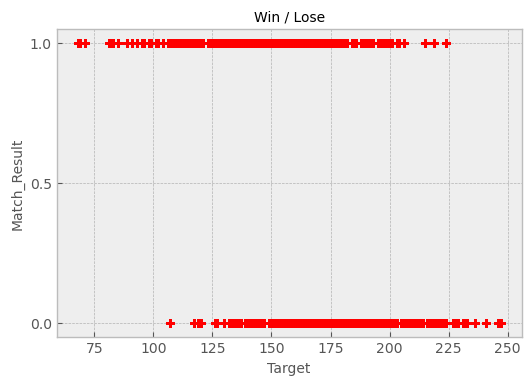

In [154]:
# Here, graph shows a clear inverse relationship between target and win,
# lower target corresponds to a higher chance of winning, while a higher target shows lower chance of winning.

plt.style.use('bmh')  

plt.figure(figsize=(6,4))  

plt.scatter(new_df['Target'], new_df['match_result'], marker='+', color='Red') 

plt.xlabel('Target', fontsize=10)
plt.ylabel('Match_Result', fontsize=10)
plt.title('Win / Lose', fontsize=10)

plt.yticks([0, 0.5, 1])

plt.show()  

### Machine Learning. 

In [155]:
# Selecting features for the machine learning model from 'new_df'.

X = new_df[['BattingTeam','BowlingTeam','City','Target','runs_left','balls_left','wickets_left','CRR','RRR']] 

# Selecting the target variable for the model, which is 'match_result'.

y = new_df['match_result']    

In [156]:
from sklearn.model_selection import train_test_split # Importing train_test_split from sklearn library.

# Here, splitting the dataset into training and testing sets. 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)    

In [157]:
# Shapes of the training and testing feature sets.

print(X_train.shape, X_test.shape)   

(71960, 9) (17991, 9)


In [158]:
# List of categorical columns.

cat_cols = ['BattingTeam','BowlingTeam','City']

# List of non-categorical columns.

non_cat_cols = ['Target','runs_left','balls_left','wickets_left','CRR','RRR']  

In [159]:
from sklearn.compose import ColumnTransformer  # Importing the ColumnTransformer from sklearn library.
from sklearn.preprocessing import OneHotEncoder  # Importing the OneHotEncoder from sklearn library. (encode cat columns)

In [160]:
# Creating a ColumnTransformer for column transformations. 
# 'OHE' for categorical columns. (onehotencoding apply)
# 'PASS' for non-categorical columns. (passed without transformation)

transformer = ColumnTransformer(transformers=[
        ('OHE', OneHotEncoder(sparse=False, drop='first'), cat_cols),
        ('PASS', 'passthrough', non_cat_cols)
    ],remainder='drop')  

In [161]:
from sklearn.linear_model import LogisticRegression # Importing the LogisticRegression from sklearn library for building a model
from sklearn.pipeline import Pipeline # Importing the Pipeline from sklearn library for data processing and model training. 
from sklearn import set_config # Importing set_config to display the pipeline. 
set_config(display='diagram')    

In [162]:
# Creating pipeline for one hot encoding and logistic regression model. 

pipe = Pipeline([
    ('STEP1', transformer),
    ('STEP2', LogisticRegression(solver='liblinear'))
])  

In [163]:
# Fitting the pipeline to training data. 

pipe.fit(X_train,y_train)  

Pipeline(steps=[('STEP1',
                 ColumnTransformer(transformers=[('OHE',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['BattingTeam', 'BowlingTeam',
                                                   'City']),
                                                 ('PASS', 'passthrough',
                                                  ['Target', 'runs_left',
                                                   'balls_left', 'wickets_left',
                                                   'CRR', 'RRR'])])),
                ('STEP2', LogisticRegression(solver='liblinear'))])

In [164]:
# Creating list of all features after one hot encoding. 

OHE_cols = transformer.named_transformers_['OHE'].get_feature_names_out(cat_cols)
feature_list = list(OHE_cols) + list(non_cat_cols) 

In [165]:
# Creating list of coefficients which represent the weights assigned to each feature. 

weight_list = pipe.named_steps['STEP2'].coef_.tolist()[0]

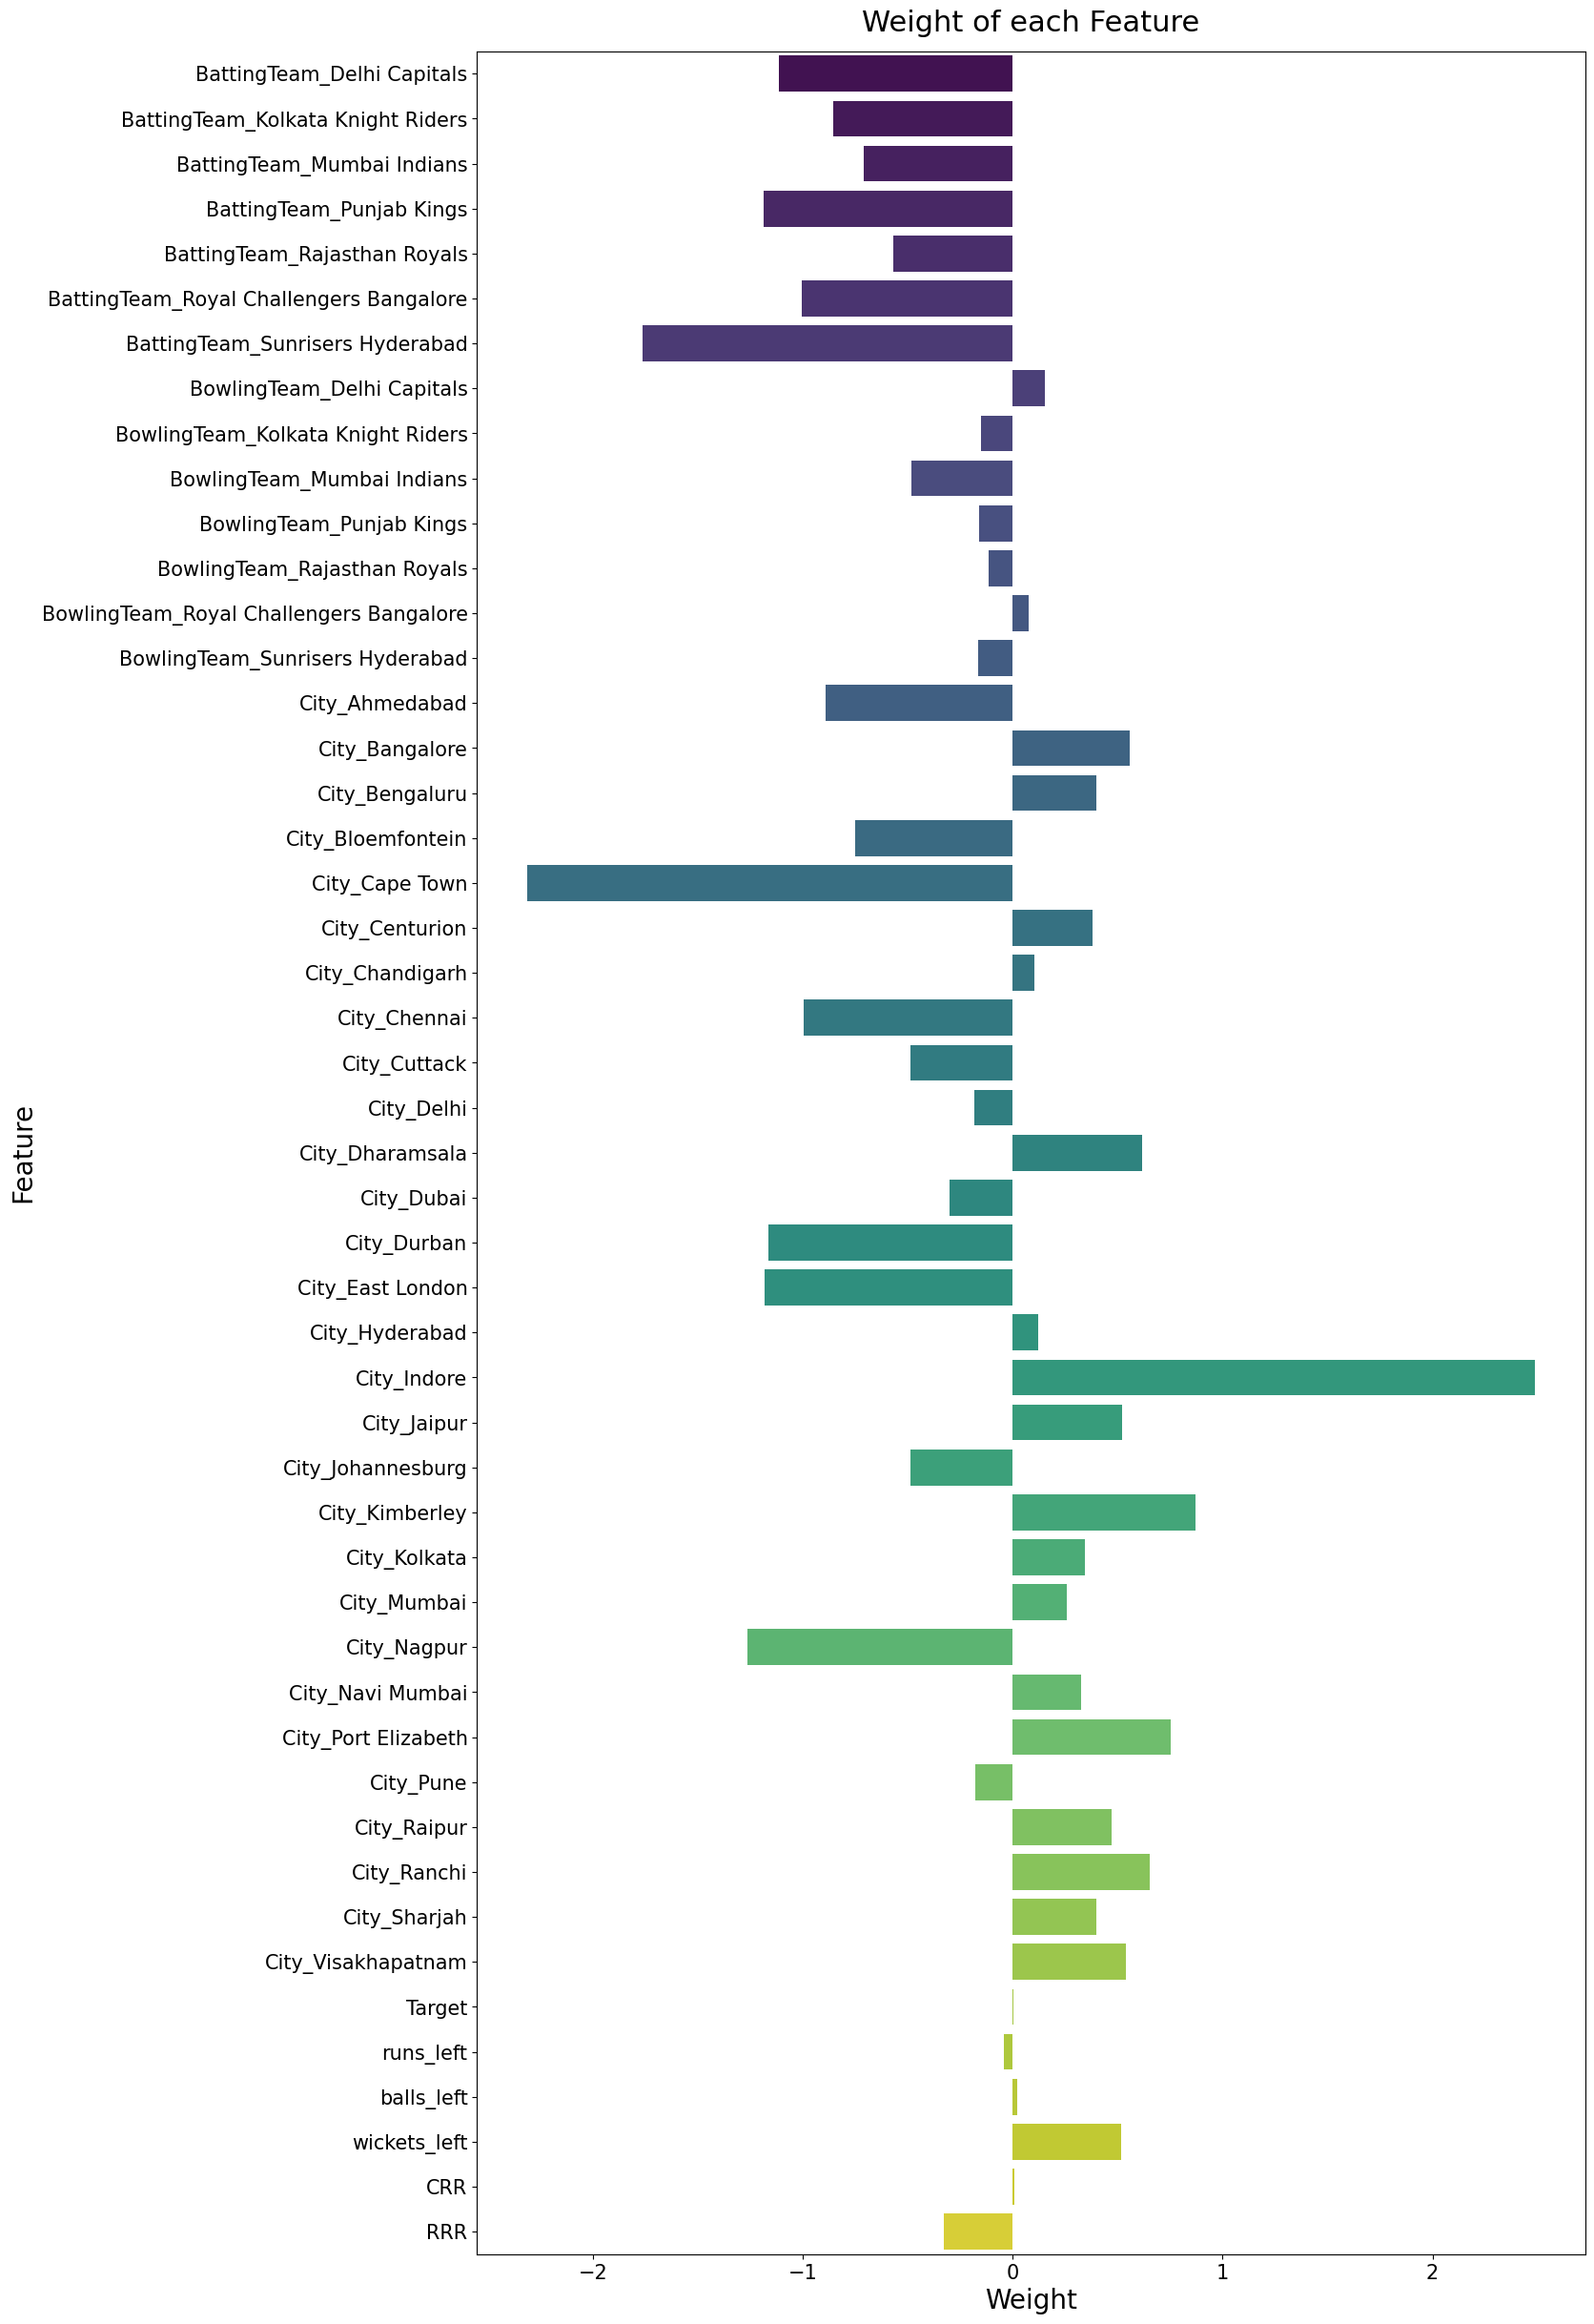

In [166]:
# Visual representation of weight each feature. 

plt.style.use('default')  

weight_of_features = pd.DataFrame( {'Feature':feature_list, 'Weight':weight_list} )  

plt.figure(figsize=(15,30)) 

sns.barplot(data=weight_of_features, x='Weight', y='Feature', orient='h', palette='viridis')  

plt.xlabel('Weight', fontsize=20)
plt.ylabel('Feature', fontsize=20)
plt.title('Weight of each Feature', fontsize=22, pad=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()  

In [167]:
# Importing sklearn metrics for model evaluation. 

from sklearn.metrics import accuracy_score , classification_report, confusion_matrix   

In [168]:
# Predictions on test set.

y_pred = pipe.predict(X_test) 

In [169]:
# Calculating accuracy score on test set. 

accuracy_score(y_test,y_pred)

0.8116280362403424

In [170]:
# Predictions on training set. 

y_pred_train = pipe.predict(X_train) 

In [171]:
# Calculating accuracy score on the train set.

accuracy_score(y_train,y_pred_train)  

0.8079627570872707

In [172]:
from sklearn.model_selection import cross_val_score # # Importing cross_val_score from sklearn library. 

In [173]:
# Performing cross-validated to check accuarcy. 
# X, y split five times, and model is trained and evaluated on each time. 

cross_val_score(pipe, X, y, cv=5, scoring='accuracy').mean() 

0.8086180277465024

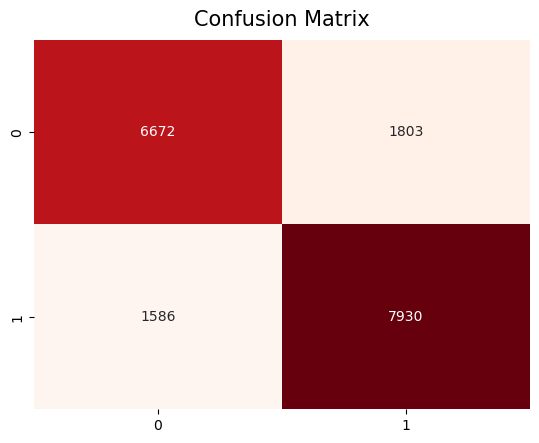

In [174]:
# Calculating the confusion matrix. 

CM = confusion_matrix(y_test, y_pred) 

sns.heatmap(CM, annot=True, fmt='d', cmap='Reds', cbar=False)

plt.title('Confusion Matrix', fontsize=15, pad=10)

plt.show() 

In [175]:
# Classification report which shows performance of model in detail

print(classification_report(y_test, y_pred))  

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      8475
           1       0.81      0.83      0.82      9516

    accuracy                           0.81     17991
   macro avg       0.81      0.81      0.81     17991
weighted avg       0.81      0.81      0.81     17991



In [176]:
# Creating a function that returns a dataframe called 'prob_df' which containing the winning probabilities for both teams,
# throughout the innings after each over.

prob_df = pd.DataFrame() 

def find_win_probability(match_id):
    
    temp_df = temp_df2[(temp_df2['ID']==match_id) & (temp_df2['ballnumber_modified']==6)] 
    temp_df = temp_df[['BattingTeam','BowlingTeam','City','Target','runs_left','balls_left','wickets_left','CRR','RRR']] 
    loop_run = temp_df.shape[0] 
    
    target = temp_df['Target'].values[0] 
    wickets_left = 10 
    
    print('BattingTeam:', temp_df['BattingTeam'].values[0])
    print('BowlingTeam:', temp_df['BowlingTeam'].values[0])  
    print('Target:', target)   
    
    list1 = []
    list2 = []
    list3 = [] 
    list4 = []
    list5 = [] 
    
    for i in range(loop_run):
        
        val = temp_df.iloc[i:i+1, :]  
        
        over_no = (i+1) 
        runs_scored = target - val['runs_left'].values[0] 
        wickets = wickets_left - val['wickets_left'].values[0]
        prediction = pipe.predict_proba(val)
        win_bat_percent = round(prediction[0,1],2)*100 
        win_bowl_percent = round(prediction[0,0],2)*100
        
        list1.append(over_no)
        list2.append(runs_scored)
        list3.append(wickets) 
        list4.append(win_bat_percent)
        list5.append(win_bowl_percent)
        
        target = val['runs_left'].values[0] 
        wickets_left = val['wickets_left'].values[0]

    prob_df['over_no'] = list1
    prob_df['runs_scored'] = list2
    prob_df['wickets_gone'] = list3 
    prob_df['bat_win_per'] = list4 
    prob_df['bowl_win_per'] = list5

    return prob_df   

In [177]:
# Pass the match id as an input to the function, and the function will return the data.
# You can pass name from match_id_list list. 

temp_df = find_win_probability(1178400)  
temp_df  

BattingTeam: Chennai Super Kings
BowlingTeam: Rajasthan Royals
Target: 152


,over_no,runs_scored,wickets_gone,bat_win_per,bowl_win_per
0,1,0,1,79.0,21.0
1,2,5,1,70.0,30.0
2,3,5,0,71.0,29.0
3,4,5,1,59.0,41.0
4,5,9,0,65.0,35.0
5,6,0,1,44.0,56.0
6,7,3,0,40.0,60.0
7,8,5,0,39.0,61.0
8,9,7,0,41.0,59.0
9,10,11,0,50.0,50.0


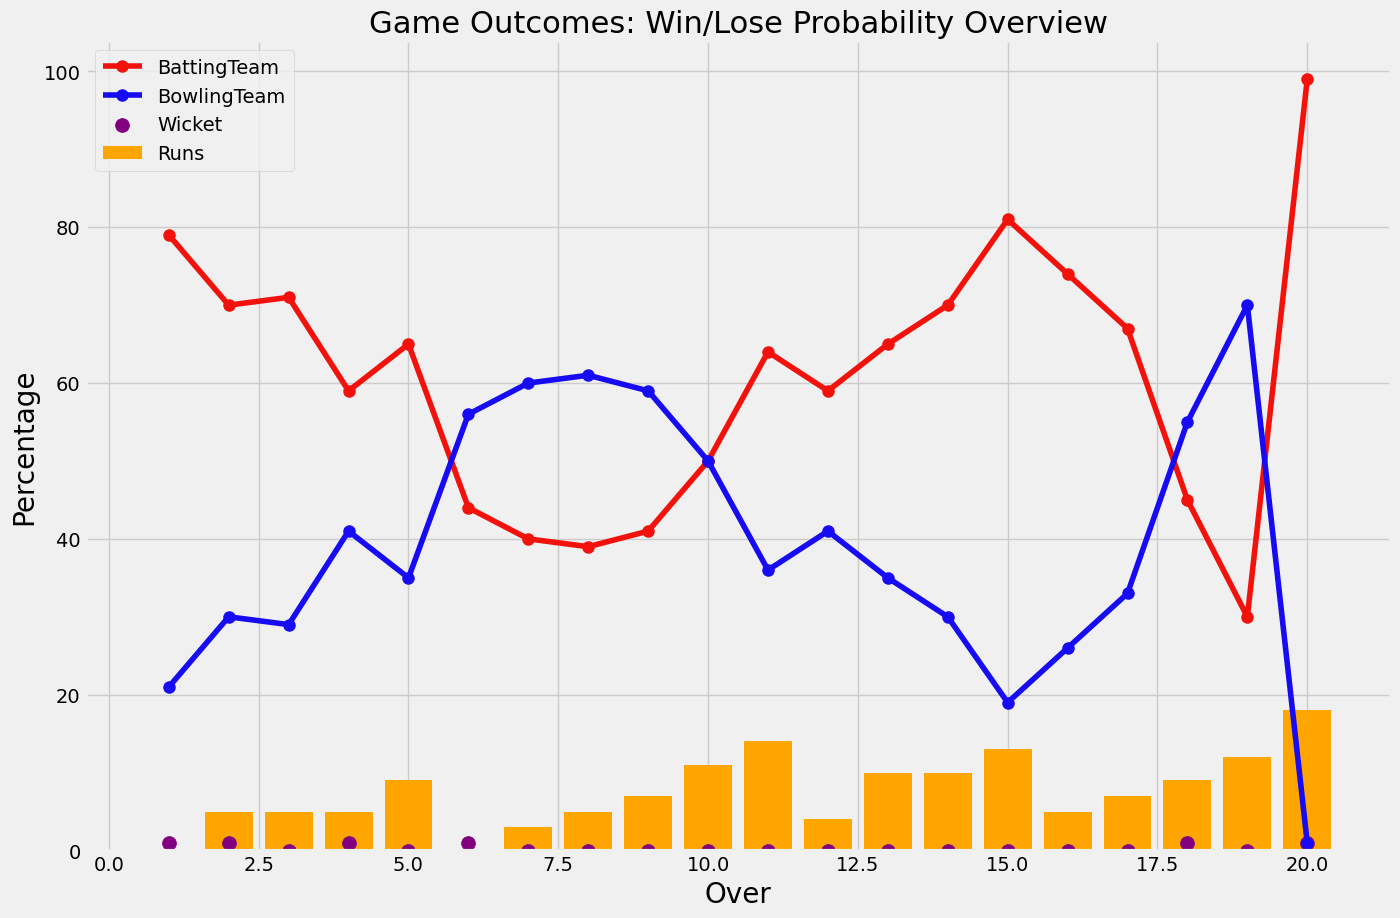

In [178]:
# This is visual representation of the win/lose probability for both teams after each over's performance.

plt.style.use('fivethirtyeight') 

plt.figure(figsize=(15,10))

plt.plot(temp_df['over_no'], temp_df['bat_win_per'], marker='.', markersize=16, linewidth=4, color='#F3120B', label='BattingTeam') 
plt.plot(temp_df['over_no'], temp_df['bowl_win_per'], marker='.', markersize=16, linewidth=4, color='#160BF3', label='BowlingTeam')
plt.bar(temp_df['over_no'], temp_df['runs_scored'], color='orange', label='Runs')
plt.scatter(temp_df['over_no'], temp_df['wickets_gone'], color='purple', marker='o', label='Wicket', s=100)

plt.title('Game Outcomes: Win/Lose Probability Overview', fontsize=22)
plt.xlabel('Over', fontsize=20)
plt.ylabel('Percentage', fontsize=20)
plt.legend(fontsize='medium')
plt.show()  

In [179]:
import pickle # Importing the pickle module. 

In [180]:
# Saving trained machine learning pipeline. 

pickle.dump(pipe, open('IPL_MATCH_PREDICTION.pkl','wb')) 

In [181]:
# Loading a saved machine learning pipeline ('IPL_prediction.pkl') 

loaded_model = pickle.load(open('IPL_MATCH_PREDICTION.pkl','rb'))   

In [182]:
# Creating function that takes raw data as input and returns dataframe ready for input into a loaded machine learning model. 

def input_df(bat,bowl,city,target,runs,balls,wickets,crr,rrr):
    
    input_data = pd.DataFrame([{
        'BattingTeam':bat,
        'BowlingTeam':bowl,
        'City':city,
        'Target':target,
        'runs_left':runs,
        'balls_left':balls,
        'wickets_left':wickets,
        'CRR':crr,
        'RRR':rrr,
    }]) 
    
    return input_data 

In [183]:
# Making a prediction based on the loaded machine learning pipeline

data = input_df('Royal Challengers Bangalore','Kolkata Knight Riders','Mumbai',180,180,120,10,0,9.00)

# Printing answer. 

if loaded_model.predict(data)[0]==1:
    
    print('High Probability of WIN')

else:
    
    print('High Probability of LOSS') 

High Probability of LOSS
